In [ ]:
import shutil
import gzip

# Specify the input .csv.gz file path and the output .csv file path
input_file = r"/content/data_public (1).csv.gz"  # Note the raw string (r"")
output_file = r"/content/data_public.csv"

# Open the .csv.gz file in binary mode for reading and write its decompressed content to a new .csv file
with gzip.open(input_file, 'rb') as gz_file:  # 'rb' mode for reading binary
    with open(output_file, 'wb') as csv_file:  # 'wb' mode for writing binary
        shutil.copyfileobj(gz_file, csv_file)

print(f"Converted {input_file} to {output_file}.")

Converted /content/data_public (1).csv.gz to /content/data_public.csv.


In [ ]:
import pandas as pd
import numpy as np
import psutil

def basic_preprocess(df):
    # Perform minimal processing
    # Just handle missing values in numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    return df

def process_large_csv(file_path, output_path, chunksize=100000):
    # Get total number of rows and columns in the input file
    df_sample = pd.read_csv(file_path, nrows=1)
    total_columns = len(df_sample.columns)
    total_rows = sum(1 for _ in open(file_path)) - 1  # Subtract 1 for header
    print(f"Input file: {total_rows} rows, {total_columns} columns")

    # Read the CSV file in chunks
    chunks = pd.read_csv(file_path, chunksize=chunksize)

    processed_rows = 0

    # Open the output file in append mode
    with open(output_path, 'w', newline='') as f:
        for i, chunk in enumerate(chunks, 1):
            print(f"Processing chunk {i}")
            processed_chunk = basic_preprocess(chunk)
            chunk_rows, chunk_cols = processed_chunk.shape
            processed_rows += chunk_rows

            # Write the processed chunk to the output file
            if i == 1:
                processed_chunk.to_csv(f, index=False)
            else:
                processed_chunk.to_csv(f, index=False, header=False)

            # Print progress and chunk info
            print(f"Chunk {i}: {chunk_rows} rows, {chunk_cols} columns")
            print(f"Processed {processed_rows} out of {total_rows} rows")
            print(f"Memory usage: {psutil.virtual_memory().percent}%")

            # Clear memory
            del processed_chunk

    # Verify the output file
    output_rows = sum(1 for _ in open(output_path)) - 1  # Subtract 1 for header
    df_output_sample = pd.read_csv(output_path, nrows=1)
    output_columns = len(df_output_sample.columns)

    print(f"\nProcessing complete.")
    print(f"Input file: {total_rows} rows, {total_columns} columns")
    print(f"Processed rows: {processed_rows}")
    print(f"Output file: {output_rows} rows, {output_columns} columns")

    if processed_rows == total_rows == output_rows and total_columns == output_columns:
        print("All rows successfully processed and written!")
    else:
        print("Warning: There's a mismatch in the number of rows or columns.")

    print(f"Data saved to {output_path}")

# Usage
input_file = '/content/data_public.csv'
output_file = '/content/data_public(processed).csv'
process_large_csv(input_file, output_file)

Input file: 1200000 rows, 16 columns
Processing chunk 1
Chunk 1: 100000 rows, 16 columns
Processed 100000 out of 1200000 rows
Memory usage: 4.6%
Processing chunk 2
Chunk 2: 100000 rows, 16 columns
Processed 200000 out of 1200000 rows
Memory usage: 4.6%
Processing chunk 3
Chunk 3: 100000 rows, 16 columns
Processed 300000 out of 1200000 rows
Memory usage: 4.6%
Processing chunk 4
Chunk 4: 100000 rows, 16 columns
Processed 400000 out of 1200000 rows
Memory usage: 4.6%
Processing chunk 5
Chunk 5: 100000 rows, 16 columns
Processed 500000 out of 1200000 rows
Memory usage: 4.7%
Processing chunk 6
Chunk 6: 100000 rows, 16 columns
Processed 600000 out of 1200000 rows
Memory usage: 4.7%
Processing chunk 7
Chunk 7: 100000 rows, 16 columns
Processed 700000 out of 1200000 rows
Memory usage: 4.7%
Processing chunk 8
Chunk 8: 100000 rows, 16 columns
Processed 800000 out of 1200000 rows
Memory usage: 4.7%
Processing chunk 9
Chunk 9: 100000 rows, 16 columns
Processed 900000 out of 1200000 rows
Memory usa

In [ ]:
import pandas as pd
import numpy as np
import psutil

def basic_preprocess(df):
    # Identify numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns

    # Count missing values before filling
    missing_before = df[numeric_columns].isnull().sum().sum()

    # Fill missing values with column mean
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

    # Count missing values after filling
    missing_after = df[numeric_columns].isnull().sum().sum()

    # Calculate how many missing values were filled
    missing_filled = missing_before - missing_after
    return df, missing_filled

def process_large_csv(file_path, output_path, chunksize=100000):
    # Get total number of rows and columns in the input file
    df_sample = pd.read_csv(file_path, nrows=1)
    total_columns = len(df_sample.columns)
    total_rows = sum(1 for _ in open(file_path)) - 1  # Subtract 1 for header
    print(f"Input file: {total_rows} rows, {total_columns} columns")

    # Read the CSV file in chunks
    chunks = pd.read_csv(file_path, chunksize=chunksize)

    processed_rows = 0
    total_missing_filled = 0  # Track total missing values filled

    # Open the output file in append mode
    with open(output_path, 'w', newline='') as f:
        for i, chunk in enumerate(chunks, 1):
            print(f"Processing chunk {i}")
            processed_chunk, missing_filled = basic_preprocess(chunk)

            # Update counters
            total_missing_filled += missing_filled
            chunk_rows, chunk_cols = processed_chunk.shape
            processed_rows += chunk_rows

            # Write the processed chunk to the output file
            if i == 1:
                processed_chunk.to_csv(f, index=False)
            else:
                processed_chunk.to_csv(f, index=False, header=False)

            # Print progress and chunk info
            print(f"Chunk {i}: {chunk_rows} rows, {chunk_cols} columns")
            print(f"Processed {processed_rows} out of {total_rows} rows")
            print(f"Missing values filled in this chunk: {missing_filled}")
            print(f"Total missing values filled so far: {total_missing_filled}")
            print(f"Memory usage: {psutil.virtual_memory().percent}%")

            # Clear memory
            del processed_chunk

    # Verify the output file
    output_rows = sum(1 for _ in open(output_path)) - 1  # Subtract 1 for header
    df_output_sample = pd.read_csv(output_path, nrows=1)
    output_columns = len(df_output_sample.columns)

    print(f"\nProcessing complete.")
    print(f"Input file: {total_rows} rows, {total_columns} columns")
    print(f"Processed rows: {processed_rows}")
    print(f"Output file: {output_rows} rows, {output_columns} columns")
    print(f"Total missing values filled: {total_missing_filled}")

    if processed_rows == total_rows == output_rows and total_columns == output_columns:
        print("All rows successfully processed and written!")
    else:
        print("Warning: There's a mismatch in the number of rows or columns.")

    print(f"Data saved to {output_path}")

# Usage
input_file = '/content/data_public.csv'
output_file = '/content/data_public(processed).csv'
process_large_csv(input_file, output_file)



Input file: 1200000 rows, 16 columns
Processing chunk 1
Chunk 1: 100000 rows, 16 columns
Processed 100000 out of 1200000 rows
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Memory usage: 4.6%
Processing chunk 2
Chunk 2: 100000 rows, 16 columns
Processed 200000 out of 1200000 rows
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Memory usage: 4.7%
Processing chunk 3
Chunk 3: 100000 rows, 16 columns
Processed 300000 out of 1200000 rows
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Memory usage: 4.7%
Processing chunk 4
Chunk 4: 100000 rows, 16 columns
Processed 400000 out of 1200000 rows
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Memory usage: 4.7%
Processing chunk 5
Chunk 5: 100000 rows, 16 columns
Processed 500000 out of 1200000 rows
Missing values filled in this chunk: 0
Total missing values filled so far: 0
Memory usage: 4.7%
Processing chunk 6
Chunk 6: 100000 row

Descriptive Statistics for Numeric Columns:
        Mean         Std           Min           Max
A  50.686560  129.249190 -5.078748e+07  9.526008e+07
B -18.833727   14.463539 -5.078748e+07  9.526008e+07
C  71.621520  105.280740 -5.078748e+07  9.526008e+07
D -13.551203   46.897718 -5.078748e+07  9.526008e+07
E  29.441774   72.822746 -5.078748e+07  9.526008e+07
F  -6.185189   73.090973 -5.078748e+07  9.526008e+07
G  31.741864   66.603262 -5.078748e+07  9.526008e+07
H  51.125037  103.405238 -5.078748e+07  9.526008e+07
I  33.000772   42.171170 -5.078748e+07  9.526008e+07
J  40.925456   76.943828 -5.078748e+07  9.526008e+07
K  79.383400   94.839993 -5.078748e+07  9.526008e+07
L  -6.746540   15.574889 -5.078748e+07  9.526008e+07
M -42.322899   17.911410 -5.078748e+07  9.526008e+07
N  49.490124   67.282286 -5.078748e+07  9.526008e+07
O  59.803333   66.777092 -5.078748e+07  9.526008e+07

Class Distribution:
Class 1: 180594 (15.05%)
Class 2: 449885 (37.49%)
Class 3: 569521 (47.46%)


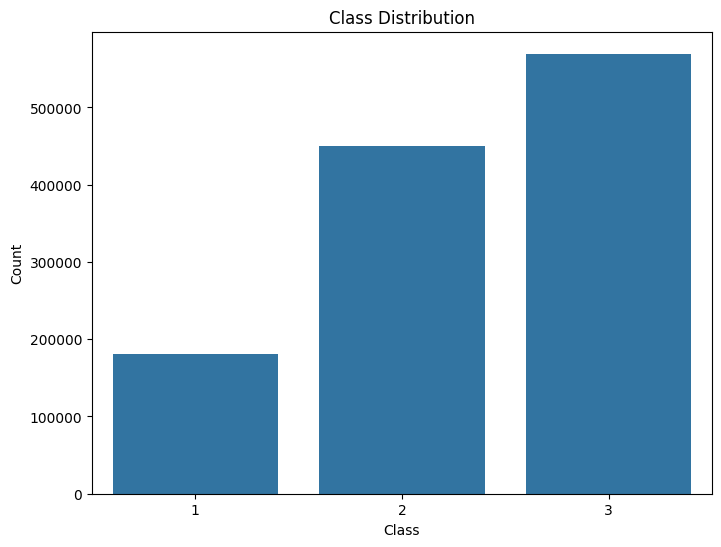

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explore_data(file_path, chunksize=100000):
    # Initialize variables to store aggregated statistics
    total_rows = 0
    sum_values = None
    sum_squares = None
    class_distribution = {1: 0, 2: 0, 3: 0}

    # Read and process the CSV file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        total_rows += len(chunk)

        # Update sum and sum of squares for numeric columns
        numeric_columns = chunk.columns[:-1]  # All columns except 'Class'
        if sum_values is None:
            sum_values = chunk[numeric_columns].sum()
            sum_squares = (chunk[numeric_columns] ** 2).sum()
        else:
            sum_values += chunk[numeric_columns].sum()
            sum_squares += (chunk[numeric_columns] ** 2).sum()

        # Update class distribution
        class_counts = chunk['Class'].value_counts()
        for cls in class_counts.index:
            class_distribution[cls] += class_counts[cls]

    # Calculate mean and standard deviation
    mean_values = sum_values / total_rows
    std_values = np.sqrt(sum_squares / total_rows - mean_values ** 2)

    # Print descriptive statistics
    print("Descriptive Statistics for Numeric Columns:")
    stats_df = pd.DataFrame({
        'Mean': mean_values,
        'Std': std_values,
        'Min': sum_values.min(),
        'Max': sum_values.max()
    })
    print(stats_df)

    # Print class distribution
    print("\nClass Distribution:")
    for cls, count in class_distribution.items():
        print(f"Class {cls}: {count} ({count/total_rows*100:.2f}%)")

    # Visualize class distribution
    plt.figure(figsize=(8, 6))
    sns.barplot(x=list(class_distribution.keys()), y=list(class_distribution.values()))
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Usage
file_path = '/content/data_public(processed).csv'
explore_data(file_path)

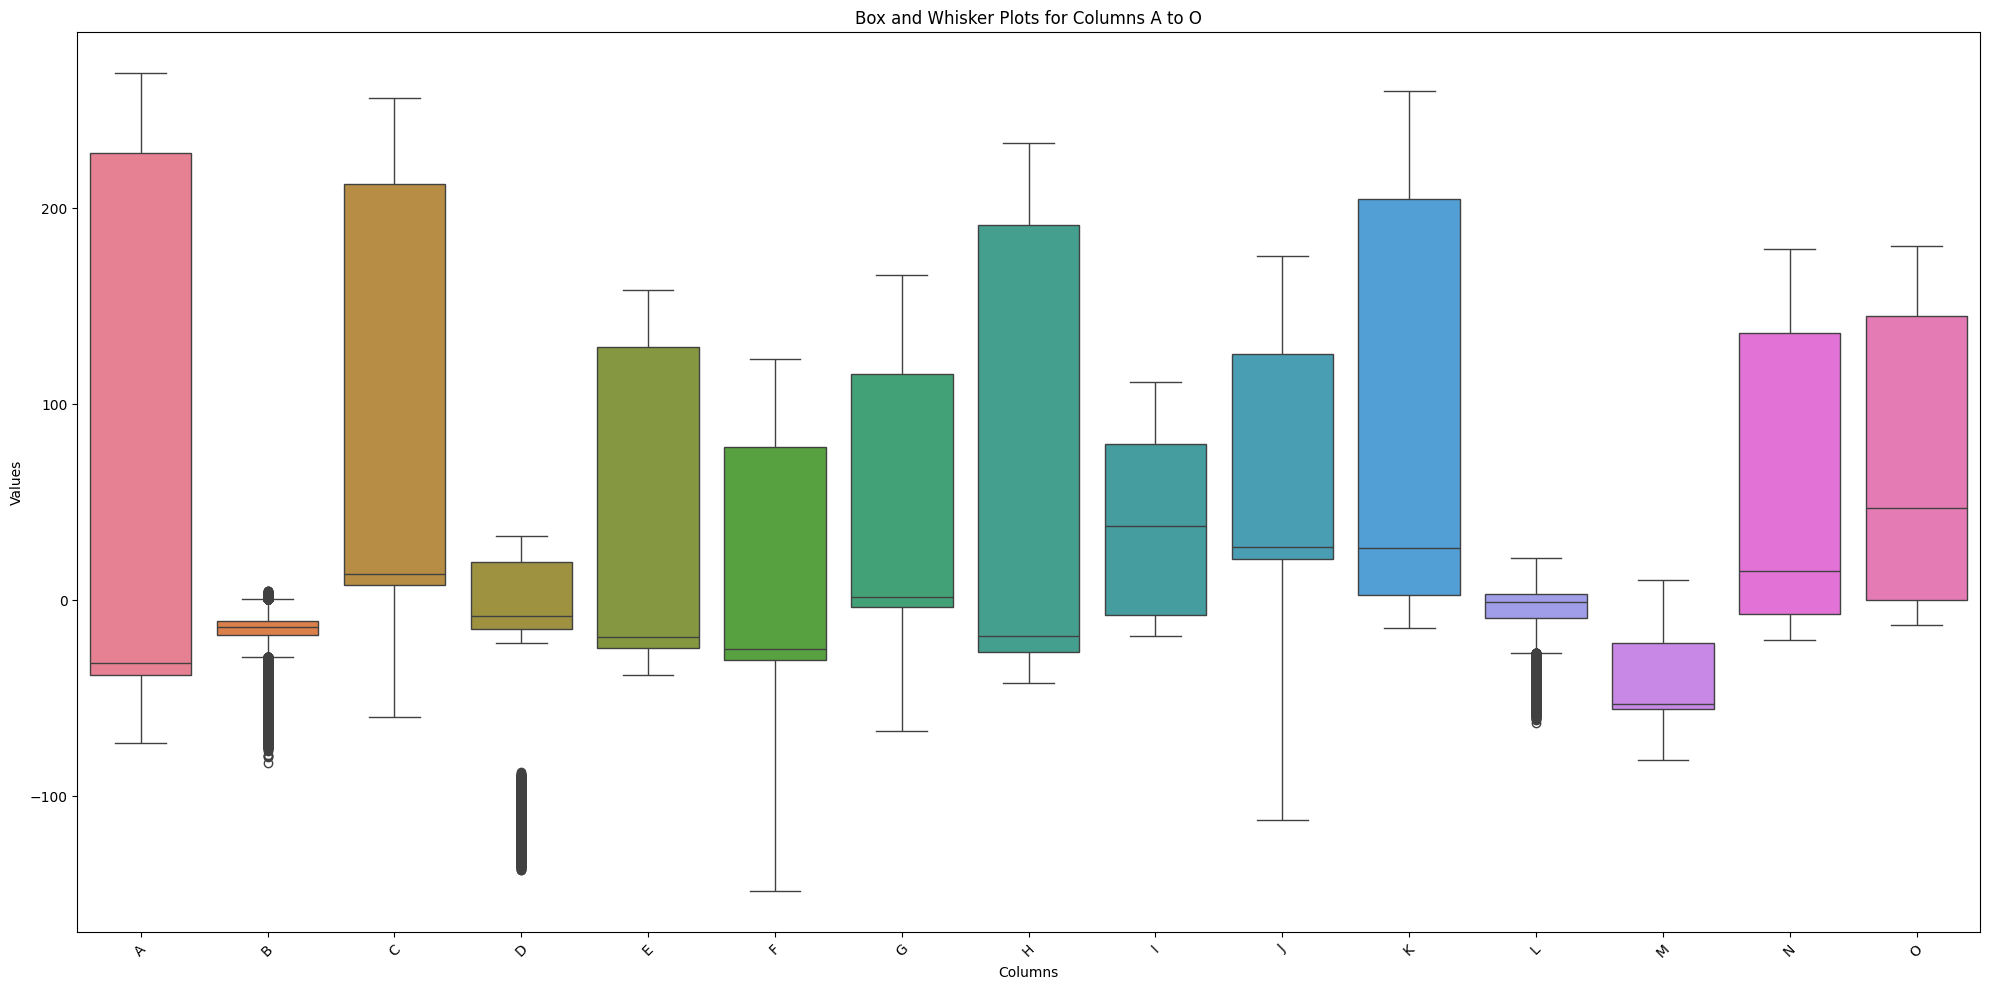

In [ ]:
def explore_data(file_path, chunksize=100000):
    # [Previous code remains the same]

    # After calculating statistics, create box plots
    plt.figure(figsize=(20, 10))
    box_plot_data = []

    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        numeric_columns = chunk.columns[:-1]  # All columns except 'Class'
        box_plot_data.append(chunk[numeric_columns])

    box_plot_df = pd.concat(box_plot_data, ignore_index=True)

    sns.boxplot(data=box_plot_df)
    plt.title('Box and Whisker Plots for Columns A to O')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage
file_path = '/content/data_public.csv'
explore_data(file_path)

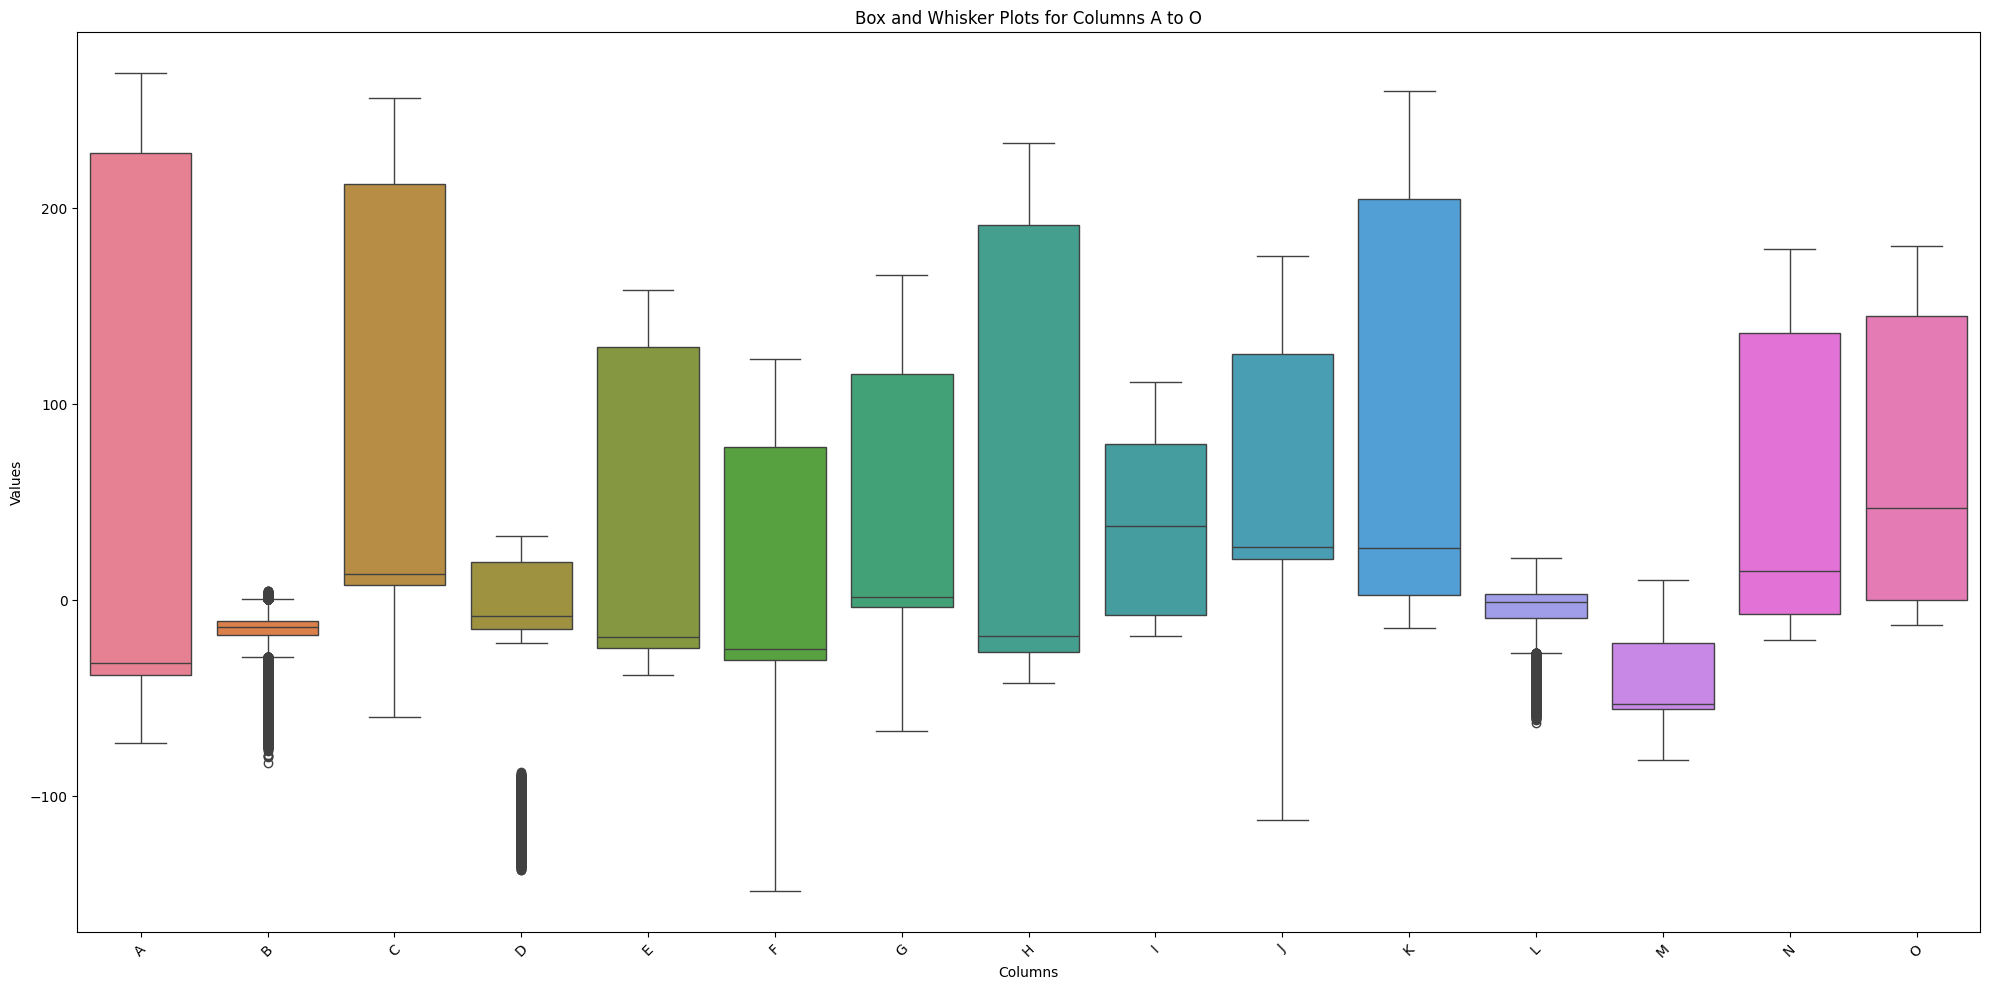

In [ ]:
def explore_data(file_path, chunksize=100000):
    # [Previous code remains the same]

    # After calculating statistics, create box plots
    plt.figure(figsize=(20, 10))
    box_plot_data = []

    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        numeric_columns = chunk.columns[:-1]  # All columns except 'Class'
        box_plot_data.append(chunk[numeric_columns])

    box_plot_df = pd.concat(box_plot_data, ignore_index=True)

    sns.boxplot(data=box_plot_df)
    plt.title('Box and Whisker Plots for Columns A to O')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Usage
file_path = '/content/data_public(processed).csv'
explore_data(file_path)

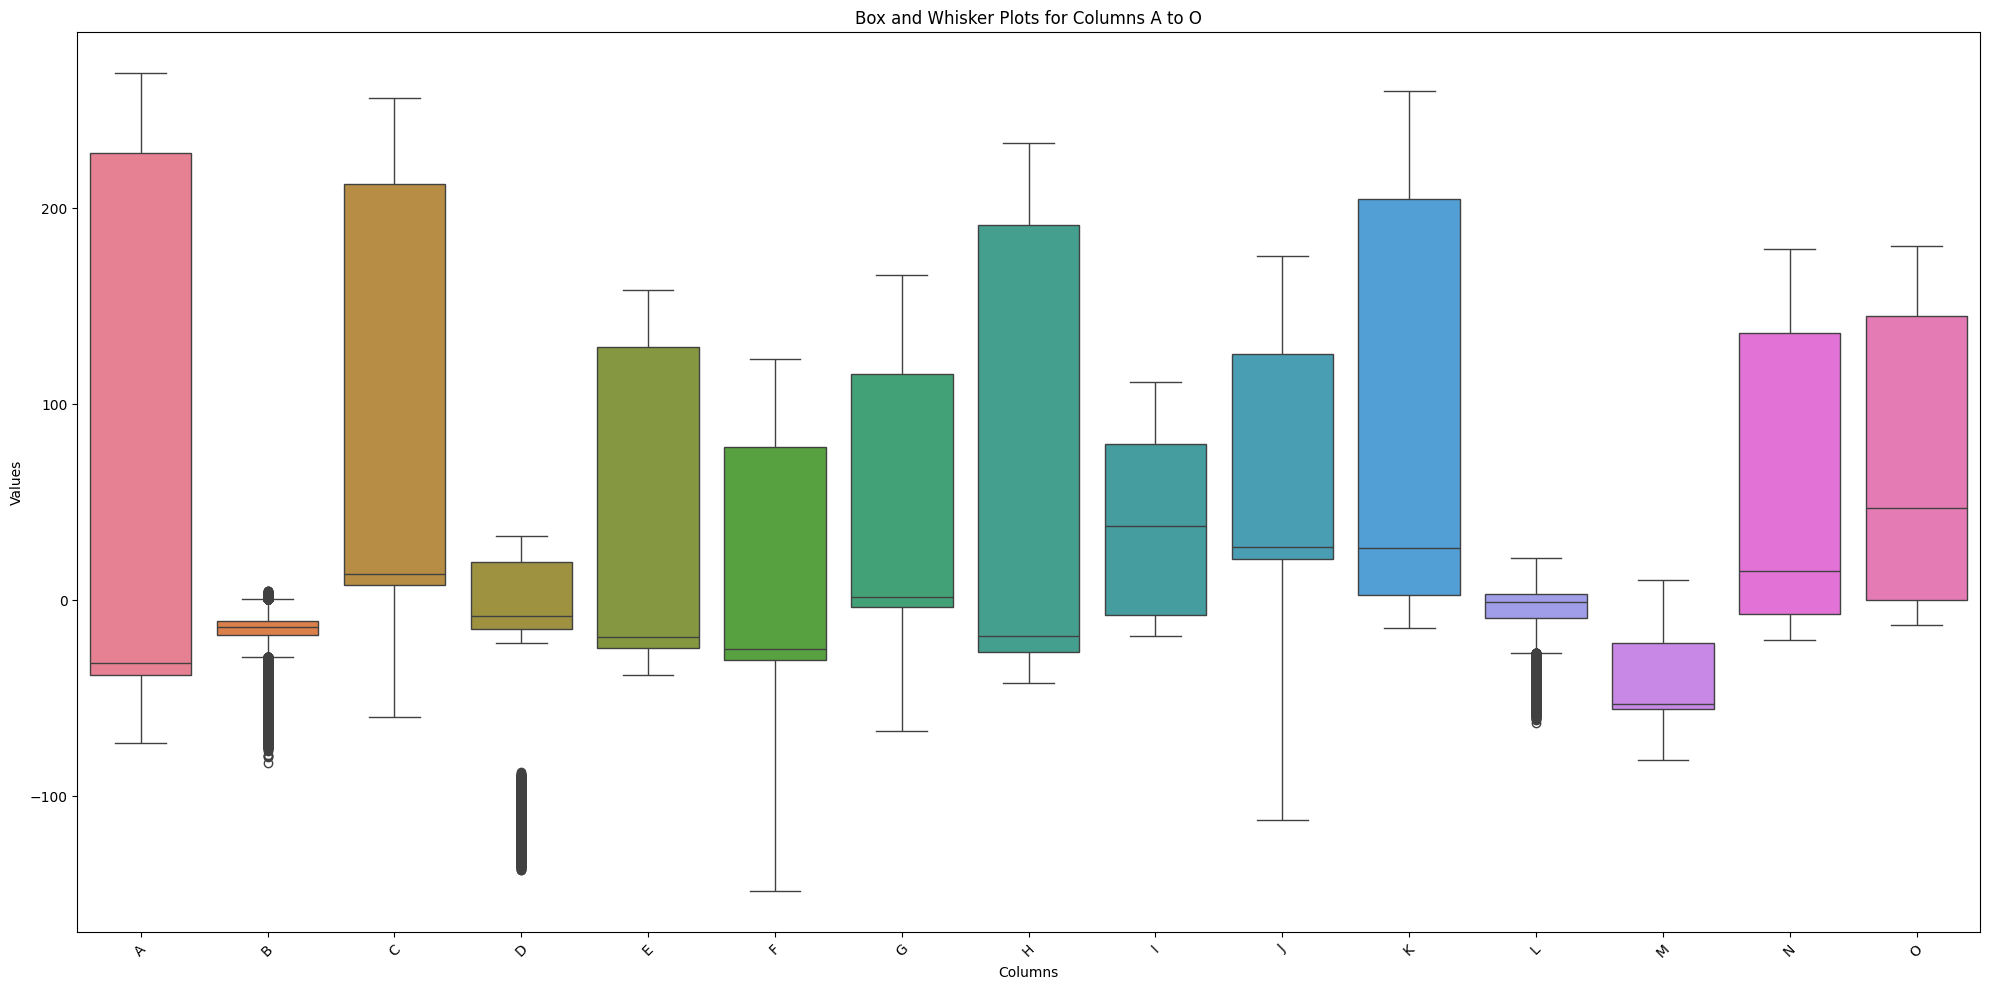


Outlier Counts:
A: 0 outliers
B: 200303 outliers
C: 0 outliers
D: 200103 outliers
E: 0 outliers
F: 0 outliers
G: 0 outliers
H: 0 outliers
I: 0 outliers
J: 0 outliers
K: 0 outliers
L: 198366 outliers
M: 0 outliers
N: 0 outliers
O: 0 outliers


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def explore_data(file_path, chunksize=100000):
    # [Previous code remains the same]

    # After calculating statistics, create box plots and count outliers
    plt.figure(figsize=(20, 10))
    box_plot_data = []
    outlier_counts = {}

    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        numeric_columns = chunk.columns[:-1]  # All columns except 'Class'
        box_plot_data.append(chunk[numeric_columns])

        # Count outliers for each column
        for col in numeric_columns:
            Q1 = chunk[col].quantile(0.25)
            Q3 = chunk[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = chunk[(chunk[col] < lower_bound) | (chunk[col] > upper_bound)][col]
            outlier_counts[col] = outlier_counts.get(col, 0) + len(outliers)

    box_plot_df = pd.concat(box_plot_data, ignore_index=True)

    sns.boxplot(data=box_plot_df)
    plt.title('Box and Whisker Plots for Columns A to O')
    plt.xlabel('Columns')
    plt.ylabel('Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Print outlier counts
    print("\nOutlier Counts:")
    for col, count in outlier_counts.items():
        print(f"{col}: {count} outliers")

# Usage
file_path = '/content/data_public(processed).csv'
explore_data(file_path)

In [ ]:
def explore_data(file_path, chunksize=100000):
    # Initialize variables
    total_rows = 0
    sum_values = None
    sum_squares = None
    class_distribution = {1: 0, 2: 0, 3: 0}
    outlier_counts = {col: {'below_min': 0, 'above_max': 0} for col in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O']}

    # Process the CSV file in chunks
    for chunk in pd.read_csv(file_path, chunksize=chunksize):
        total_rows += len(chunk)
        numeric_columns = chunk.columns[:-1]  # All columns except 'Class'

        # Update statistics
        if sum_values is None:
            sum_values = chunk[numeric_columns].sum()
            sum_squares = (chunk[numeric_columns] ** 2).sum()
        else:
            sum_values += chunk[numeric_columns].sum()
            sum_squares += (chunk[numeric_columns] ** 2).sum()

        # Update class distribution
        class_counts = chunk['Class'].value_counts()
        for cls in class_counts.index:
            class_distribution[cls] += class_counts[cls]

        # Count outliers
        for col in numeric_columns:
            Q1 = chunk[col].quantile(0.25)
            Q3 = chunk[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_counts[col]['below_min'] += sum(chunk[col] < lower_bound)
            outlier_counts[col]['above_max'] += sum(chunk[col] > upper_bound)

    # Calculate final statistics
    mean_values = sum_values / total_rows
    std_values = np.sqrt(sum_squares / total_rows - mean_values ** 2)

    # Print outlier counts
    print("\nOutlier Counts:")
    total_outliers = 0
    for col, counts in outlier_counts.items():
        below_min = counts['below_min']
        above_max = counts['above_max']
        total = below_min + above_max
        total_outliers += total
        print(f"{col}: {total} outliers ({below_min} below min, {above_max} above max)")

    print(f"\nTotal outliers across all columns: {total_outliers}")

# Usage
file_path = '/content/data_public(processed).csv'
explore_data(file_path)


Outlier Counts:
A: 0 outliers (0 below min, 0 above max)
B: 200303 outliers (199909 below min, 394 above max)
C: 0 outliers (0 below min, 0 above max)
D: 200103 outliers (200103 below min, 0 above max)
E: 0 outliers (0 below min, 0 above max)
F: 0 outliers (0 below min, 0 above max)
G: 0 outliers (0 below min, 0 above max)
H: 0 outliers (0 below min, 0 above max)
I: 0 outliers (0 below min, 0 above max)
J: 0 outliers (0 below min, 0 above max)
K: 0 outliers (0 below min, 0 above max)
L: 198366 outliers (198365 below min, 1 above max)
M: 0 outliers (0 below min, 0 above max)
N: 0 outliers (0 below min, 0 above max)
O: 0 outliers (0 below min, 0 above max)

Total outliers across all columns: 598772


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/data_public(processed).csv'
df = pd.read_csv(file_path)

# Columns for capping
numeric_columns = ['B', 'D', 'L']  # Add the columns where outliers need to be capped

# Manually apply capping for each column
for col in numeric_columns:
    # Calculate 1st and 99th percentiles
    lower_bound = df[col].quantile(0.01)
    upper_bound = df[col].quantile(0.99)

    # Print bounds for reference
    print(f"Column {col}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")

    # Count outliers before capping
    below_min = (df[col] < lower_bound).sum()
    above_max = (df[col] > upper_bound).sum()
    print(f"{col}: {below_min} below min, {above_max} above max")

    # Apply capping
    df[col] = df[col].clip(lower_bound, upper_bound)

# Save the capped dataset
output_file = '/content/data_public_capped.csv'
df.to_csv(output_file, index=False)

print("Capping complete. Data saved to:", output_file)


Column B: Lower bound = -59.96528696791195, Upper bound = -3.7934404534482216
B: 12000 below min, 12000 above max
Column D: Lower bound = -121.92383575558844, Upper bound = 25.522929139586545
D: 12000 below min, 12000 above max
Column L: Lower bound = -46.72708753776107, Upper bound = 11.035627397532286
L: 12000 below min, 12000 above max
Capping complete. Data saved to: /content/data_public_capped.csv


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = '/content/data_public(processed).csv'
df = pd.read_csv(file_path)

# Define columns to check for outliers
numeric_columns = ['B', 'D', 'L']  # Specify the columns with potential outliers

# Iterate over each numeric column to handle outliers
for col in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR

    # Determine bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count and print the number of outliers before capping
    below_min = (df[col] < lower_bound).sum()
    above_max = (df[col] > upper_bound).sum()
    print(f"Before capping - Column {col}: {below_min} below min, {above_max} above max")

    # Cap the values at the lower and upper bounds
    df[col] = df[col].clip(lower_bound, upper_bound)

    # Count and print the number of outliers after capping
    below_min_after = (df[col] < lower_bound).sum()
    above_max_after = (df[col] > upper_bound).sum()
    print(f"After capping - Column {col}: {below_min_after} below min, {above_max_after} above max")

data = df  # Now 'data' contains the cleaned DataFrame without outliers

print("Outlier handling complete. Cleaned data stored in variable 'data'.")

Before capping - Column B: 199906 below min, 391 above max
After capping - Column B: 0 below min, 0 above max
Before capping - Column D: 200103 below min, 0 above max
After capping - Column D: 0 below min, 0 above max
Before capping - Column L: 198365 below min, 0 above max
After capping - Column L: 0 below min, 0 above max
Outlier handling complete. Cleaned data stored in variable 'data'.


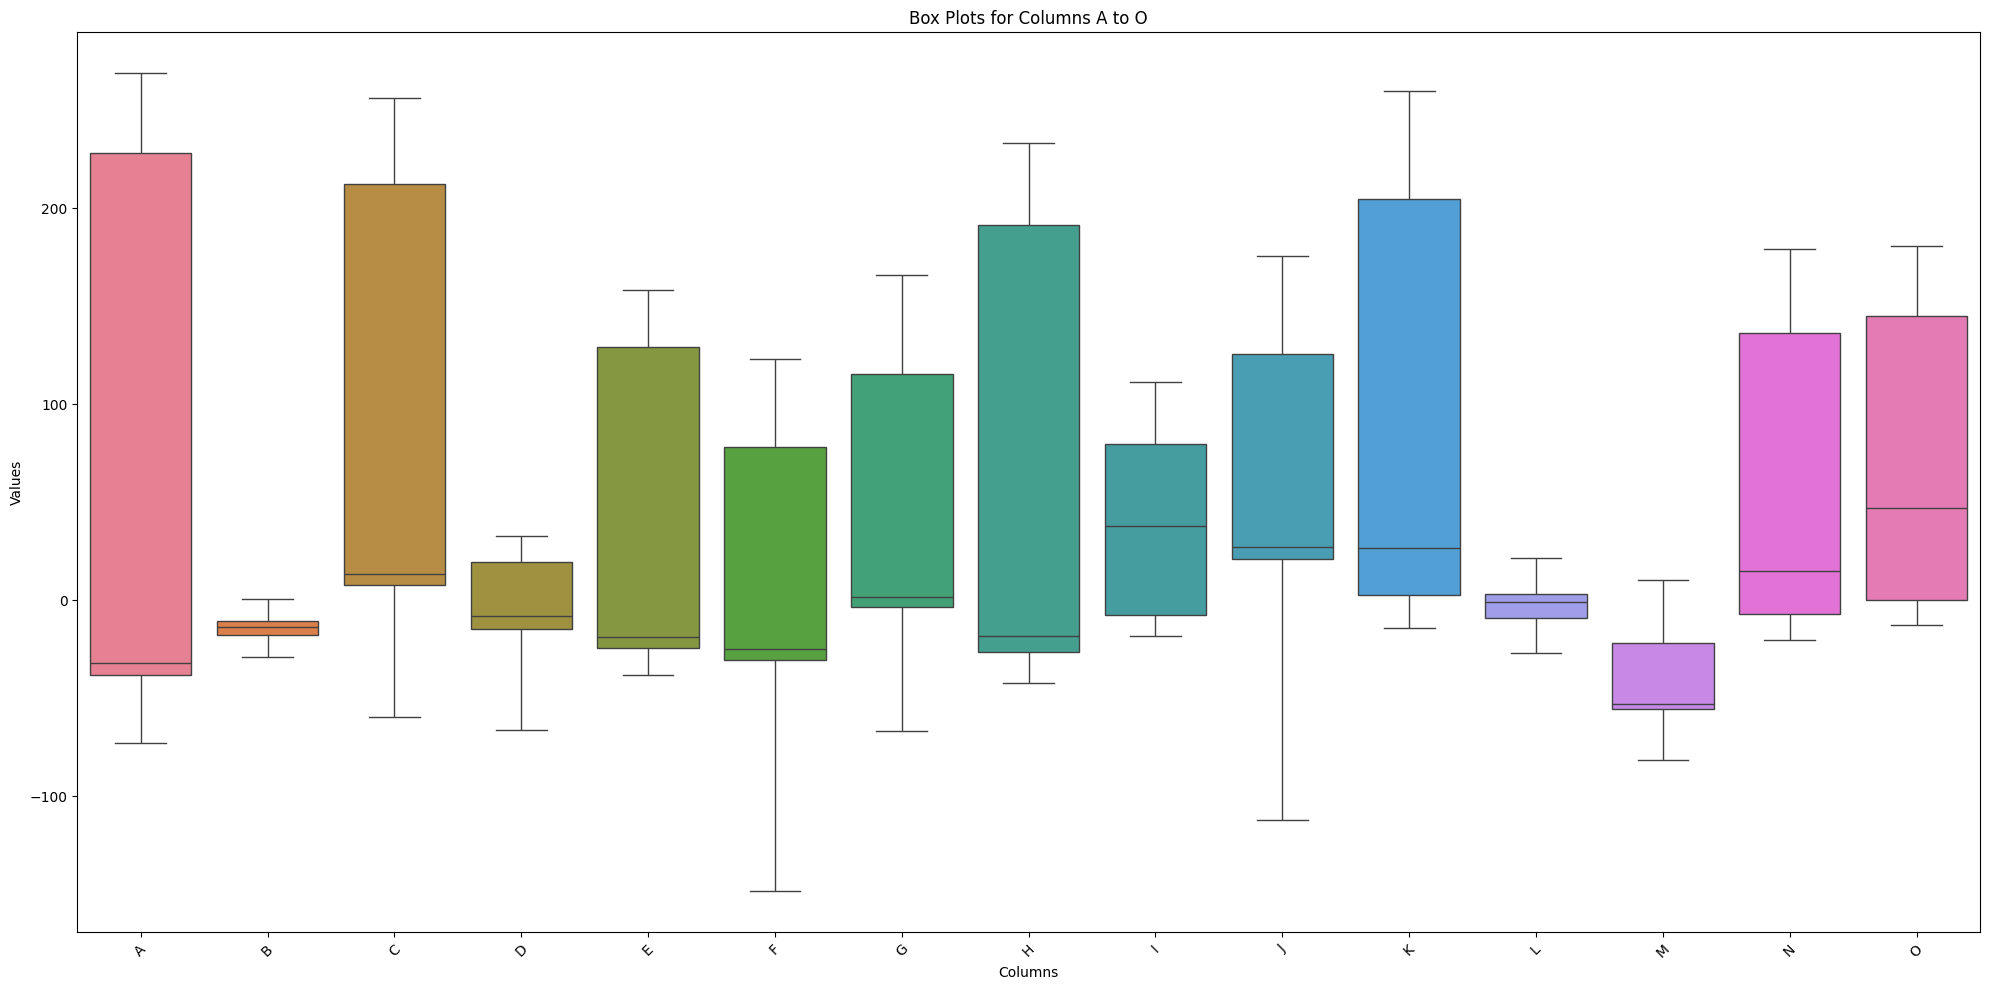


Outlier Counts After Handling:
A: 0 below min, 0 above max
B: 0 below min, 0 above max
C: 0 below min, 0 above max
D: 0 below min, 0 above max
E: 0 below min, 0 above max
F: 0 below min, 0 above max
G: 0 below min, 0 above max
H: 0 below min, 0 above max
I: 0 below min, 0 above max
J: 0 below min, 0 above max
K: 0 below min, 0 above max
L: 0 below min, 0 above max
M: 0 below min, 0 above max
N: 0 below min, 0 above max
O: 0 below min, 0 above max


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_visualize = [chr(i) for i in range(ord('A'), ord('O') + 1)]  # Generates ['A', 'B', ..., 'O']

outlier_counts = {}

for col in columns_to_visualize:
    if col in data.columns:  # Check if the column exists in the DataFrame
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Calculate IQR

        # Determine bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before capping
        below_min = (data[col] < lower_bound).sum()
        above_max = (data[col] > upper_bound).sum()
        outlier_counts[col] = {'below_min': below_min, 'above_max': above_max}

        # Cap the values at the lower and upper bounds
        data[col] = data[col].clip(lower_bound, upper_bound)

# Visualization of box plots for columns A to O
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[columns_to_visualize])
plt.title('Box Plots for Columns A to O')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print outlier counts after handling
print("\nOutlier Counts After Handling:")
for col, counts in outlier_counts.items():
    print(f"{col}: {counts['below_min']} below min, {counts['above_max']} above max")

In [ ]:
summary = data.describe()
print(summary)

                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   5.068656e+01 -1.538722e+01  7.162152e+01 -5.778168e+00  2.944177e+01   
std    1.292492e+02  7.039593e+00  1.052808e+02  3.087996e+01  7.282278e+01   
min   -7.308940e+01 -2.883263e+01 -5.972853e+01 -6.612051e+01 -3.829826e+01   
25%   -3.793679e+01 -1.786669e+01  7.553164e+00 -1.471337e+01 -2.436286e+01   
50%   -3.197847e+01 -1.369876e+01  1.348796e+01 -8.004308e+00 -1.897058e+01   
75%    2.280020e+02 -1.055606e+01  2.123439e+02  1.955806e+01  1.289018e+02   
max    2.687738e+02  4.098900e-01  2.561698e+02  3.263799e+01  1.579843e+02   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean  -6.185189e+00  3.174186e+01  5.112504e+01  3.300077e+01  4.092546e+01   
std    7.309100e+01  6.660329e+01  1.034053e+02  4.

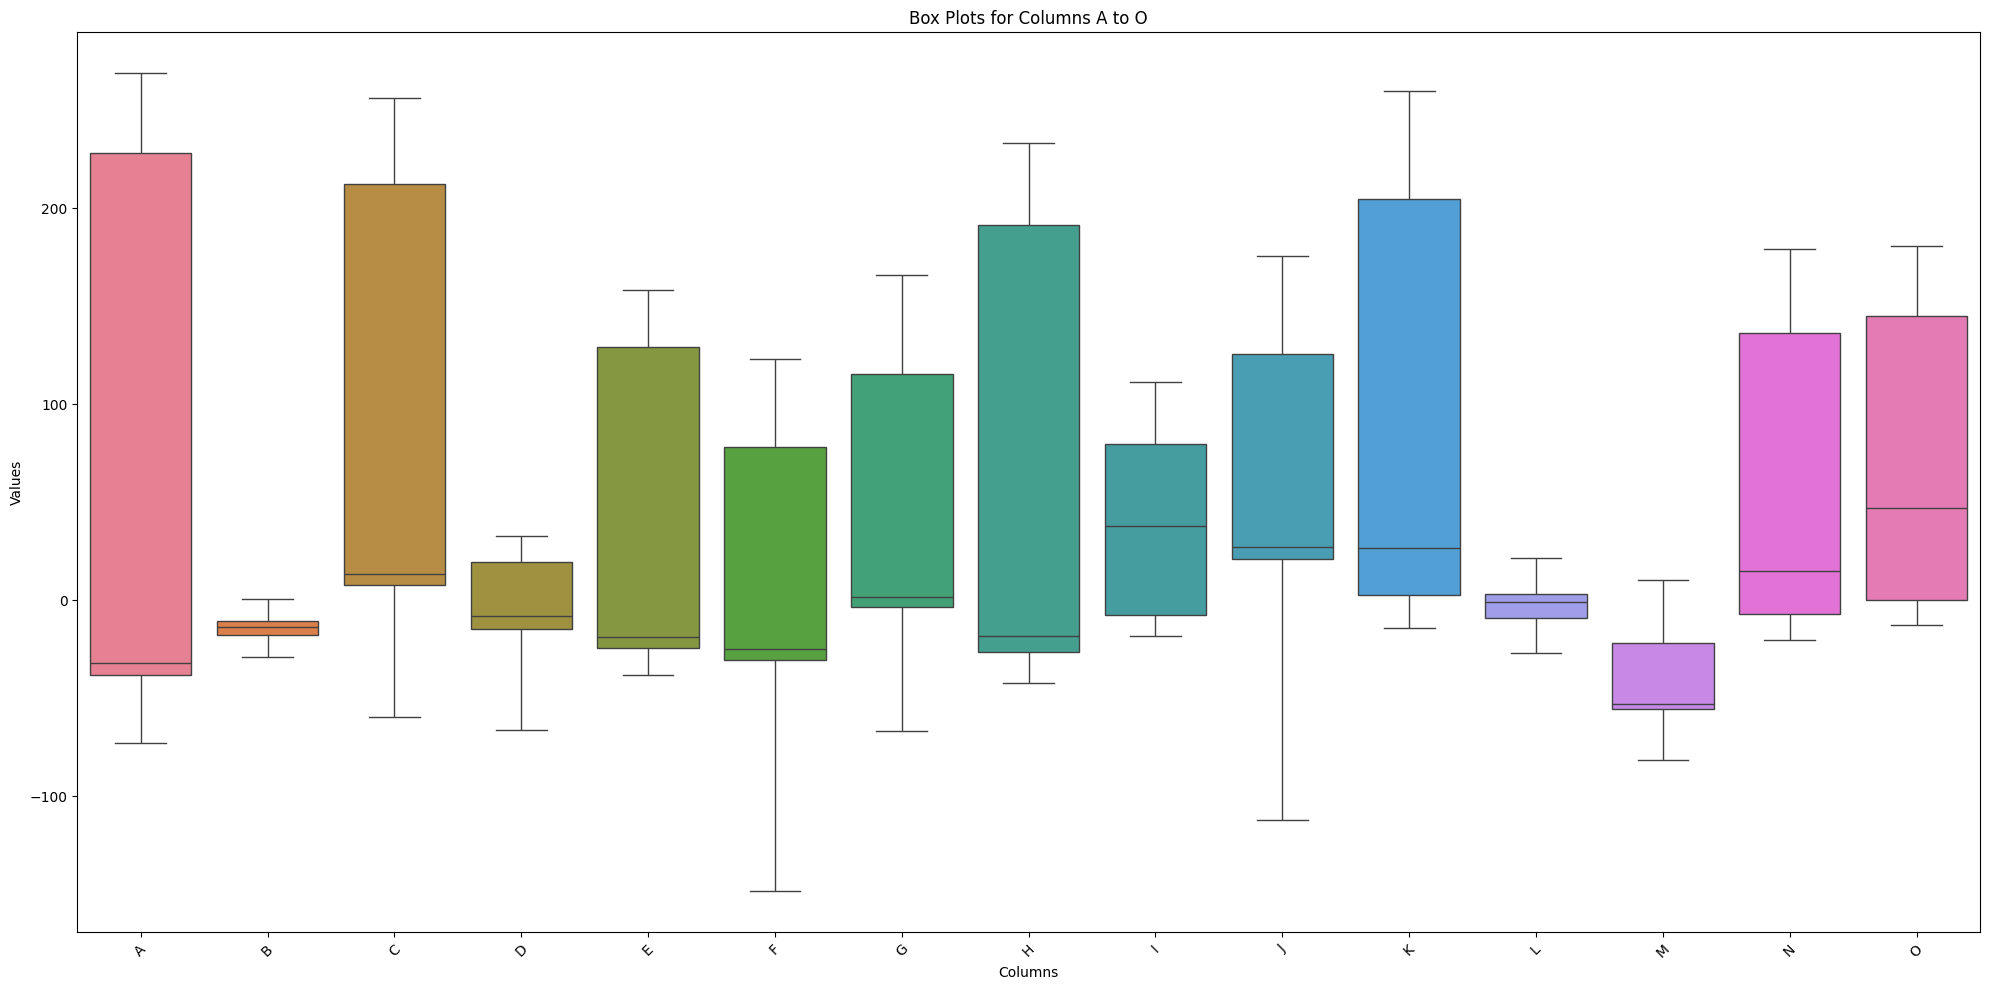

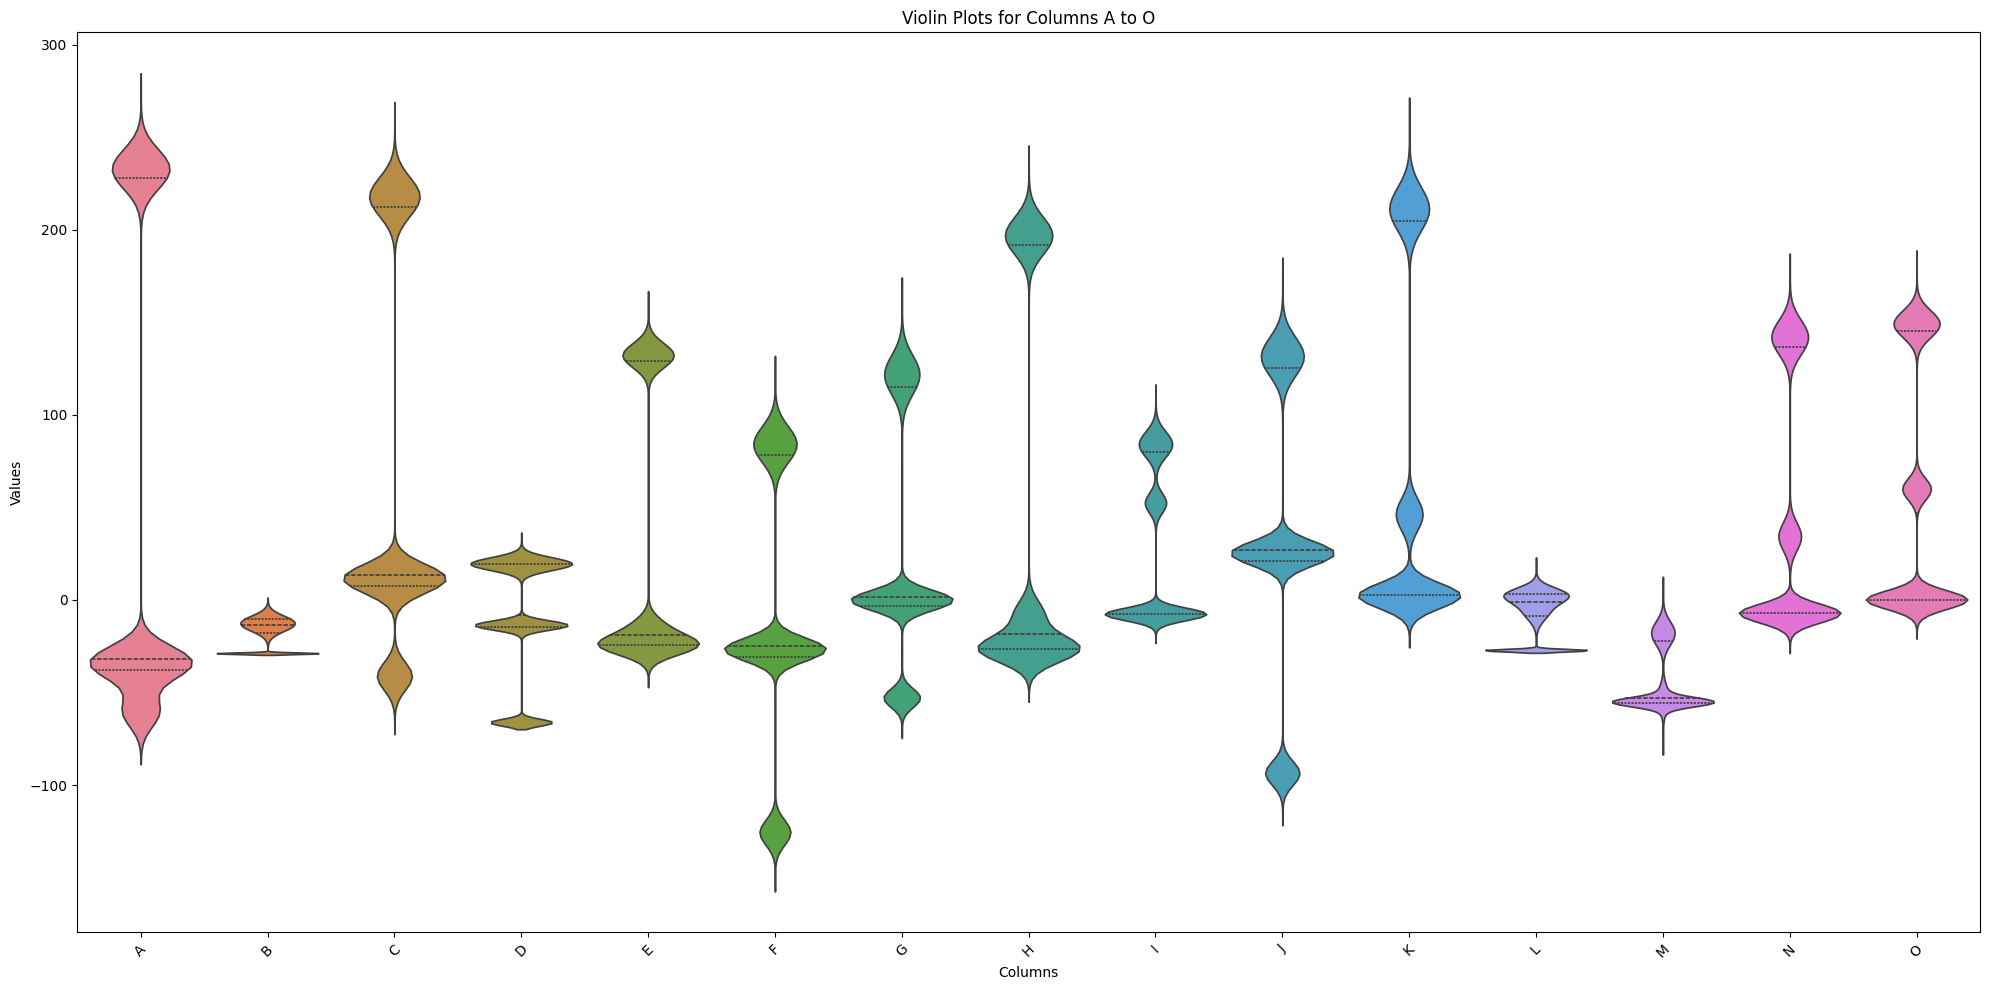

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_visualize = [chr(i) for i in range(ord('A'), ord('O') + 1)]  # Generates ['A', 'B', ..., 'O']

outlier_counts = {}

for col in columns_to_visualize:
    if col in data.columns:  # Check if the column exists in the DataFrame
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1  # Calculate IQR

        # Determine bounds for outlier detection
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count outliers before capping
        below_min = (data[col] < lower_bound).sum()
        above_max = (data[col] > upper_bound).sum()
        outlier_counts[col] = {'below_min': below_min, 'above_max': above_max}

        # Cap the values at the lower and upper bounds
        data[col] = data[col].clip(lower_bound, upper_bound)

# Visualization of box plots for columns A to O
plt.figure(figsize=(20, 10))
sns.boxplot(data=data[columns_to_visualize])
plt.title('Box Plots for Columns A to O')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(20, 10))
sns.violinplot(data=data[columns_to_visualize], inner='quartile')
plt.title('Violin Plots for Columns A to O')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print outlier counts after handling
print("\nOutlier Counts After Handling:")
for col, counts in outlier_counts.items():
    print(f"{col}: {counts['below_min']} below min, {counts['above_max']} above max")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame already loaded in memory

# Separate features (all columns except the last) and the target (last column)
features = data.iloc[:, :-1]  # Select all columns except the last one
target = data.iloc[:, -1]     # Select the last column

# Select numeric columns for normalization
numeric_columns = features.select_dtypes(include=[np.number]).columns  # Automatically select numeric columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform only the numeric columns
features_scaled = features.copy()  # Make a copy of the features
features_scaled[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Reconstruct the dataset by combining scaled features and the target column
data_scaled = pd.concat([features_scaled, target], axis=1)

# Print summary statistics after scaling (excluding the target column)
summary_after_scaling = data_scaled.iloc[:, :-1].describe()
print("\nSummary of Data After Normalization and Scaling (Excluding Last Column):")
print(summary_after_scaling)





Outlier Counts After Handling:
A: 0 below min, 0 above max
B: 0 below min, 0 above max
C: 0 below min, 0 above max
D: 0 below min, 0 above max
E: 0 below min, 0 above max
F: 0 below min, 0 above max
G: 0 below min, 0 above max
H: 0 below min, 0 above max
I: 0 below min, 0 above max
J: 0 below min, 0 above max
K: 0 below min, 0 above max
L: 0 below min, 0 above max
M: 0 below min, 0 above max
N: 0 below min, 0 above max
O: 0 below min, 0 above max

Summary of Data After Normalization and Scaling (Excluding Last Column):
                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean  -5.814016e-17  4.972496e-16  3.012524e-16 -5.175120e-18  9.492851e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -9.576537e-01 -1.909971e+00 -1.247617e+00 -1.954095e+00 -9.302043e-01   
25%   -6.856782e-01 -3.522178e-01 -6.085477e-01 -2.893528e-01 -7.388438e-01   


In [ ]:
data_scaled.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,1.398333,0.451196,1.386800,-0.318451,1.518831,1.136805,1.499176,1.421937,1.182621,1.123217,1.531100,-0.106005,1.542774,1.390885,1.402222,3
1,-0.686316,0.169260,-0.589262,0.909069,-0.755534,-0.166762,-0.477999,-0.820431,-0.980689,-0.222670,-0.792750,0.662984,-0.949550,-0.909245,-0.875843,2
2,-0.695429,-0.714762,-0.480605,0.827995,-0.759987,-0.177913,-0.520931,-0.739075,-0.939343,-0.190270,-0.774695,0.958485,-0.815240,-0.805046,-0.910959,2
3,1.322591,1.363981,1.378256,-0.133505,1.336854,1.249231,1.157837,1.416902,1.175193,1.509929,1.408750,0.101215,1.499253,1.274864,1.338920,3
4,1.376193,0.417568,1.263438,-0.242861,1.503497,1.331041,1.259054,1.529661,1.350708,1.161552,1.290718,0.280061,1.518267,1.469607,1.313165,3


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your DataFrame already loaded in memory

# Separate features (all columns except the last) and the target (last column)
features = data.iloc[:, :-1]  # Select all columns except the last one
target = data.iloc[:, -1]     # Select the last column

# Select numeric columns for normalization
numeric_columns = features.select_dtypes(include=[np.number]).columns  # Automatically select numeric columns

# Initialize the StandardScaler
scaler = MinMaxScaler()

# Fit and transform only the numeric columns
features_scaled = features.copy()  # Make a copy of the features
features_scaled[numeric_columns] = scaler.fit_transform(features[numeric_columns])

# Reconstruct the dataset by combining scaled features and the target column
data_scaled1 = pd.concat([features_scaled, target], axis=1)

# Print summary statistics after scaling (excluding the target column)
summary_after_scaling = data_scaled1.iloc[:, :-1].describe()
print("\nSummary of Data After Normalization and Scaling (Excluding Last Column):")
print(summary_after_scaling)





Summary of Data After Normalization and Scaling (Excluding Last Column):
                  A             B             C             D             E  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   3.620628e-01  4.597899e-01  4.157984e-01  6.110091e-01  3.451150e-01   
std    3.780730e-01  2.407314e-01  3.332742e-01  3.126815e-01  3.710100e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.028265e-01  3.750000e-01  2.129853e-01  5.205338e-01  7.099663e-02   
50%    1.202555e-01  5.175296e-01  2.317723e-01  5.884678e-01  9.846867e-02   
75%    8.807365e-01  6.250000e-01  8.612657e-01  8.675564e-01  8.518335e-01   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

                  F             G             H             I             J  \
count  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06  1.200000e+06   
mean   5.244976e-01  4.225513e-01  3.398052e-01  3.95313

In [ ]:
data_scaled1.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,Class
0,0.890735,0.568407,0.877983,0.511435,0.908616,0.830527,0.851839,0.873684,0.780482,0.832631,0.871484,0.434493,0.727409,0.820268,0.859137,3
1,0.102585,0.500536,0.219413,0.895258,0.064804,0.479605,0.285677,0.031767,0.075913,0.472961,0.066987,0.614922,0.241007,0.044578,0.073103,2
2,0.099140,0.287724,0.255625,0.869908,0.063152,0.476603,0.273383,0.062313,0.089379,0.481619,0.073238,0.684257,0.267219,0.079718,0.060986,2
3,0.862099,0.788143,0.875135,0.569265,0.841101,0.860792,0.754097,0.871793,0.778063,0.935974,0.829127,0.483113,0.718915,0.781141,0.837295,3
4,0.882364,0.560312,0.836870,0.535071,0.902927,0.882816,0.783080,0.914130,0.835226,0.842875,0.788266,0.525077,0.722626,0.846816,0.828408,3



Correlation Matrix for data_scaled:
          A         B         C         D         E         F         G  \
A  1.000000  0.516859  0.991999 -0.107539  0.990703  0.905353  0.972223   
B  0.516859  1.000000  0.588784  0.648449  0.428528  0.763152  0.653075   
C  0.991999  0.588784  1.000000 -0.001868  0.971805  0.943482  0.988351   
D -0.107539  0.648449 -0.001868  1.000000 -0.224545  0.313545  0.104334   
E  0.990703  0.428528  0.971805 -0.224545  1.000000  0.849129  0.939705   
F  0.905353  0.763152  0.943482  0.313545  0.849129  1.000000  0.969055   
G  0.972223  0.653075  0.988351  0.104334  0.939705  0.969055  1.000000   
H  0.988807  0.416905  0.968342 -0.239146  0.997116  0.841227  0.934714   
I  0.818399  0.023232  0.753474 -0.647316  0.879142  0.508345  0.678043   
J  0.870016  0.794616  0.915784  0.386804  0.805749  0.989868  0.949429   
K  0.968827  0.335365  0.937868 -0.336444  0.989217  0.781534  0.894114   
L  0.042617  0.682690  0.140855  0.917666 -0.068264  0.424315  

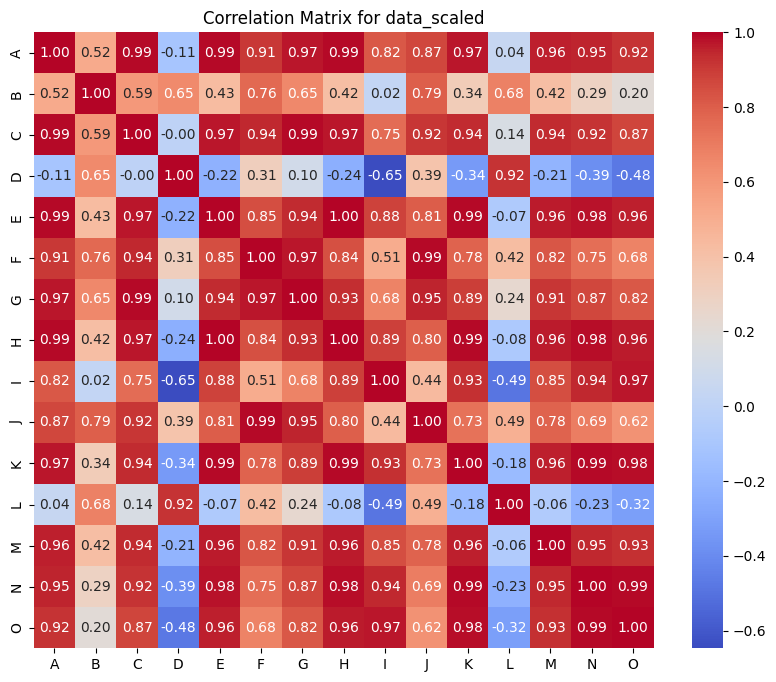

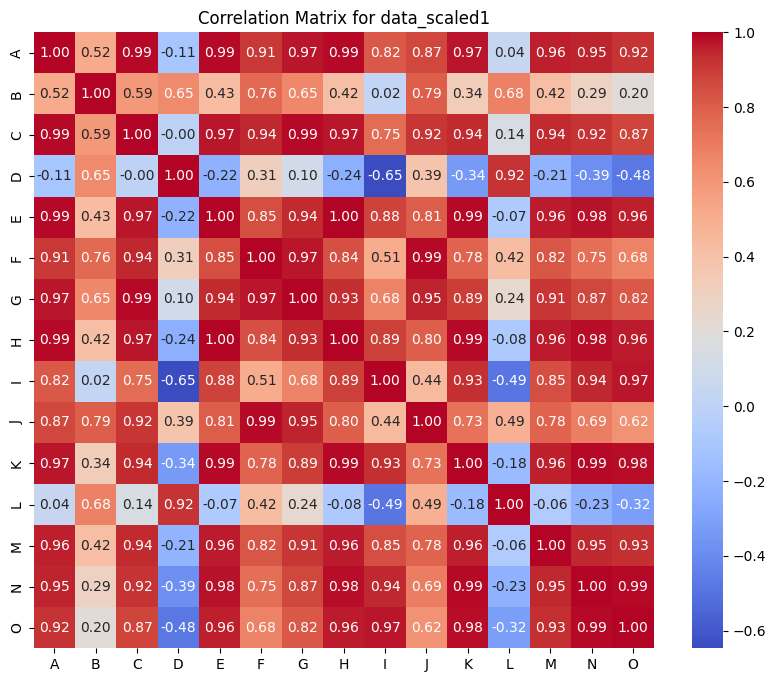

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data_scaled and data_scaled1 are your scaled datasets

# Calculate the correlation matrix for both datasets
correlation_scaled = data_scaled.iloc[:,:-1].corr()
correlation_scaled1 = data_scaled1.iloc[:,:-1].corr()

# Print the correlation matrices
print("\nCorrelation Matrix for data_scaled:")
print(correlation_scaled)

print("\nCorrelation Matrix for data_scaled1:")
print(correlation_scaled1)

# Optional: Visualize the correlation matrices using heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_scaled, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for data_scaled')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_scaled1, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix for data_scaled1')
plt.show()


In [ ]:
print(data_scaled.columns)

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')


In [ ]:


# Compute correlation matrix
correlation_matrix = data_scaled.corr().abs()

# Define the range of correlation thresholds
thresholds = np.arange(0.75, 1.00, 0.05)

for threshold in thresholds:
    # Find features with correlation > threshold
    high_corr = np.where(correlation_matrix > threshold)
    high_corr = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                 for i, j in zip(*high_corr) if i != j and i < j]

    # Drop one feature from each highly correlated pair
    features_to_drop = set([item[1] for item in high_corr])
    X_reduced = data_scaled.drop(columns=list(features_to_drop))

    print(f"Threshold: {threshold:.2f}")
    print(f"Features removed due to high correlation: {features_to_drop}")
    print(f"Number of features remaining: {X_reduced.shape[1]}")
    print("--------------------")

Threshold: 0.75
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4
--------------------
Threshold: 0.80
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4
--------------------
Threshold: 0.85
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4
--------------------
Threshold: 0.90
Features removed due to high correlation: {'F', 'H', 'K', 'J', 'E', 'C', 'O', 'N', 'G', 'L', 'M'}
Number of features remaining: 5
--------------------
Threshold: 0.95
Features removed due to high correlation: {'K', 'H', 'J', 'E', 'C', 'O', 'N', 'G', 'M'}
Number of features remaining: 7
--------------------


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, f_classif

# Assuming 'data_scaled' contains the scaled features and 'target' is the label column
X = data_scaled  # Input features
y = target        # Target variable (classification)

# Compute absolute correlation matrix
correlation_matrix = X.corr().abs()

# Define the range of correlation thresholds
thresholds = np.arange(0.75, 1.00, 0.05)

# Iterate through thresholds
for threshold in thresholds:
    # Find highly correlated features
    high_corr = np.where(correlation_matrix > threshold)
    high_corr = [(correlation_matrix.index[i], correlation_matrix.columns[j])
                 for i, j in zip(*high_corr) if i != j and i < j]

    # Drop one feature from each highly correlated pair
    features_to_drop = set([item[1] for item in high_corr])
    X_reduced = X.drop(columns=list(features_to_drop))

    print(f"\nThreshold: {threshold:.2f}")
    print(f"Features removed due to high correlation: {features_to_drop}")
    print(f"Number of features remaining: {X_reduced.shape[1]}")

    # Mutual Information
    mi_scores = mutual_info_classif(X_reduced, y, random_state=42)
    mi_series = pd.Series(mi_scores, index=X_reduced.columns).sort_values(ascending=False)
    print("Top 5 features by Mutual Information:")
    print(mi_series.head(5))
    print("MI Scores:")
    print(mi_series.head(5).to_dict())

    # ANOVA F-Test
    f_values, p_values = f_classif(X_reduced, y)
    f_series = pd.Series(f_values, index=X_reduced.columns).sort_values(ascending=False)
    print("Top 5 features by ANOVA F-test:")
    print(f_series.head(5))
    print("ANOVA Scores:")
    print(f_series.head(5).to_dict())

    print("--------------------")



Threshold: 0.75
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4
Top 5 features by Mutual Information:
Class    1.146367
D        0.448386
A        0.442726
B        0.171460
dtype: float64
MI Scores:
{'Class': 1.1463668697792997, 'D': 0.4483861636468962, 'A': 0.44272601820837787, 'B': 0.17146028269157565}
Top 5 features by ANOVA F-test:
Class             inf
D        6.076403e+05
A        2.199087e+05
B        7.271704e+04
dtype: float64
ANOVA Scores:
{'Class': inf, 'D': 607640.3062165582, 'A': 219908.74720166827, 'B': 72717.04127777848}
--------------------

Threshold: 0.80
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 5 features by Mutual Information:
Class    1.146367
D        0.448386
A        0.442726
B        0.171460
dtype: float64
MI Scores:
{'Class': 1.1463668697792997, 'D': 0.4483861636468962, 'A': 0.44272601820837787, 'B': 0.17146028269157565}
Top 5 features by ANOVA F-test:
Class             inf
D        6.076403e+05
A        2.199087e+05
B        7.271704e+04
dtype: float64
ANOVA Scores:
{'Class': inf, 'D': 607640.3062165582, 'A': 219908.74720166827, 'B': 72717.04127777848}
--------------------

Threshold: 0.85
Features removed due to high correlation: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Number of features remaining: 4


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 5 features by Mutual Information:
Class    1.146367
D        0.448386
A        0.442726
B        0.171460
dtype: float64
MI Scores:
{'Class': 1.1463668697792997, 'D': 0.4483861636468962, 'A': 0.44272601820837787, 'B': 0.17146028269157565}
Top 5 features by ANOVA F-test:
Class             inf
D        6.076403e+05
A        2.199087e+05
B        7.271704e+04
dtype: float64
ANOVA Scores:
{'Class': inf, 'D': 607640.3062165582, 'A': 219908.74720166827, 'B': 72717.04127777848}
--------------------

Threshold: 0.90
Features removed due to high correlation: {'F', 'H', 'K', 'J', 'E', 'C', 'O', 'N', 'G', 'L', 'M'}
Number of features remaining: 5


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 5 features by Mutual Information:
Class    1.146464
D        0.448157
A        0.442712
I        0.442488
B        0.171397
dtype: float64
MI Scores:
{'Class': 1.1464638697793, 'D': 0.44815727251458126, 'A': 0.44271200148061207, 'I': 0.4424880754519498, 'B': 0.171397177587012}
Top 5 features by ANOVA F-test:
Class             inf
I        7.795691e+05
D        6.076403e+05
A        2.199087e+05
B        7.271704e+04
dtype: float64
ANOVA Scores:
{'Class': inf, 'I': 779569.1201991517, 'D': 607640.3062165582, 'A': 219908.74720166827, 'B': 72717.04127777848}
--------------------

Threshold: 0.95
Features removed due to high correlation: {'K', 'H', 'J', 'E', 'C', 'O', 'N', 'G', 'M'}
Number of features remaining: 7


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Top 5 features by Mutual Information:
Class    1.147071
D        0.448327
F        0.442837
A        0.442721
I        0.442482
dtype: float64
MI Scores:
{'Class': 1.1470713003348552, 'D': 0.4483267710443217, 'F': 0.442837030949742, 'A': 0.4427214488922697, 'I': 0.44248180432525896}
Top 5 features by ANOVA F-test:
Class             inf
I        7.795691e+05
D        6.076403e+05
L        3.541497e+05
A        2.199087e+05
dtype: float64
ANOVA Scores:
{'Class': inf, 'I': 779569.1201991517, 'D': 607640.3062165582, 'L': 354149.6522313899, 'A': 219908.74720166827}
--------------------


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [ ]:
import pandas as pd

# Calculate the correlation matrix
corr_matrix = data_scaled.corr()

# Set the correlation thresholds
thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Initialize a dictionary to store the correlated features by threshold
correlated_features_by_threshold = {}

# Iterate through each threshold
for threshold in thresholds:
    correlated_features = set()

    # Iterate through the correlation matrix to find highly correlated feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    # Store the features for the current threshold
    correlated_features_by_threshold[threshold] = correlated_features

# Print the correlated features for each threshold
for threshold, features in correlated_features_by_threshold.items():
    print(f"Correlated features for threshold {threshold}: {features}")


Correlated features for threshold 0.75: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.8: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.85: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.9: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'G', 'L', 'M'}
Correlated features for threshold 0.95: {'J', 'H', 'K', 'E', 'C', 'O', 'N', 'G', 'M'}


In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

# Calculate the correlation matrix
corr_matrix = data_scaled.corr()

# Set the correlation thresholds
thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Initialize a dictionary to store the correlated features by threshold
correlated_features_by_threshold = {}

# Iterate through each threshold
for threshold in thresholds:
    correlated_features = set()

    # Iterate through the correlation matrix to find highly correlated feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    # Store the features for the current threshold
    correlated_features_by_threshold[threshold] = correlated_features

# Print the correlated features for each threshold
for threshold, features in correlated_features_by_threshold.items():
    print(f"Correlated features for threshold {threshold}: {features}")

# Initialize a dictionary to store interaction features by threshold
interaction_features_by_threshold = {}

# Iterate through each threshold and generate interaction features
for threshold, features in correlated_features_by_threshold.items():
    # Subset the data for the correlated features
    X_corr = data_scaled[list(features)]  # Make sure `data_scaled` is your feature matrix

    # Initialize PolynomialFeatures for interaction terms (degree=2, interaction_only=True)
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

    # Generate interaction terms
    X_interactions = poly.fit_transform(X_corr)

    # Create a DataFrame for the interaction features
    interaction_columns = poly.get_feature_names_out(list(features))
    X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_columns)

    # Store the interaction features for the current threshold
    interaction_features_by_threshold[threshold] = X_interactions_df

    print(f"Generated interaction features for threshold {threshold}: {X_interactions_df.columns.tolist()}")


Correlated features for threshold 0.75: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.8: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.85: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M'}
Correlated features for threshold 0.9: {'F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'G', 'L', 'M'}
Correlated features for threshold 0.95: {'J', 'H', 'K', 'E', 'C', 'O', 'N', 'G', 'M'}
Generated interaction features for threshold 0.75: ['F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M', 'F H', 'F J', 'F K', 'F E', 'F C', 'F O', 'F N', 'F I', 'F G', 'F L', 'F M', 'H J', 'H K', 'H E', 'H C', 'H O', 'H N', 'H I', 'H G', 'H L', 'H M', 'J K', 'J E', 'J C', 'J O', 'J N', 'J I', 'J G', 'J L', 'J M', 'K E', 'K C', 'K O', 'K N', 'K I', 'K G', 'K L', 'K M', 'E C', 'E O', 'E N', 'E I', 'E G', 'E L', 'E M', 'C O', 'C N', 'C I', 'C G', 'C L', 'C M', 'O N', 'O I', 'O G', 'O L', 'O M', 'N I', 'N G',

In [ ]:
# Step 1: Count the frequency of interactions across all thresholds
interaction_count = {}

# Iterate through the interaction features for each threshold and count the occurrences of each feature pair
for threshold, interactions_df in interaction_features_by_threshold.items():
    for interaction in interactions_df.columns:
        if interaction not in interaction_count:
            interaction_count[interaction] = 0
        interaction_count[interaction] += 1

# Step 2: Filter interactions based on complexity (degree >= 2)
best_interactions_by_threshold = {}

for threshold, interactions_df in interaction_features_by_threshold.items():
    # Filter interactions by complexity (degree >= 2)
    best_interactions = [interaction for interaction in interactions_df.columns if len(interaction.split()) > 1]

    # Sort interactions by their frequency across thresholds
    best_interactions = sorted(best_interactions, key=lambda x: interaction_count[x], reverse=True)

    # Store the best interactions for the current threshold
    best_interactions_by_threshold[threshold] = best_interactions

# Step 3: Print the best interactions for each threshold
for threshold, best_interactions in best_interactions_by_threshold.items():
    print(f"Best interactions for threshold {threshold}: {best_interactions}")


Best interactions for threshold 0.75: ['H K', 'H E', 'H C', 'H O', 'H N', 'H G', 'H M', 'J K', 'J E', 'J C', 'J O', 'J N', 'J G', 'J M', 'K E', 'K C', 'K O', 'K N', 'K G', 'K M', 'E C', 'E O', 'E N', 'E G', 'E M', 'C O', 'C N', 'C G', 'C M', 'O N', 'O G', 'O M', 'N G', 'N M', 'G M', 'F H', 'F J', 'F K', 'F E', 'F C', 'F O', 'F N', 'F G', 'F L', 'F M', 'H J', 'H L', 'J L', 'K L', 'E L', 'C L', 'O L', 'N L', 'G L', 'L M', 'F I', 'H I', 'J I', 'K I', 'E I', 'C I', 'O I', 'N I', 'I G', 'I L', 'I M']
Best interactions for threshold 0.8: ['H K', 'H E', 'H C', 'H O', 'H N', 'H G', 'H M', 'J K', 'J E', 'J C', 'J O', 'J N', 'J G', 'J M', 'K E', 'K C', 'K O', 'K N', 'K G', 'K M', 'E C', 'E O', 'E N', 'E G', 'E M', 'C O', 'C N', 'C G', 'C M', 'O N', 'O G', 'O M', 'N G', 'N M', 'G M', 'F H', 'F J', 'F K', 'F E', 'F C', 'F O', 'F N', 'F G', 'F L', 'F M', 'H J', 'H L', 'J L', 'K L', 'E L', 'C L', 'O L', 'N L', 'G L', 'L M', 'F I', 'H I', 'J I', 'K I', 'E I', 'C I', 'O I', 'N I', 'I G', 'I L', 'I M']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Calculate the correlation matrix
corr_matrix = data_scaled.corr()

# Set the correlation thresholds
thresholds = [0.75, 0.80, 0.85, 0.90, 0.95]

# Initialize a dictionary to store the correlated features by threshold
correlated_features_by_threshold = {}

# Iterate through each threshold
for threshold in thresholds:
    correlated_features = set()

    # Iterate through the correlation matrix to find highly correlated feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                correlated_features.add(colname)

    # Store the features for the current threshold
    correlated_features_by_threshold[threshold] = correlated_features

# Initialize a dictionary to store interaction features by threshold
interaction_features_by_threshold = {}

# Generate interaction features for each threshold
for threshold, features in correlated_features_by_threshold.items():
    # Subset the data for the correlated features
    X_corr = X[list(features)]

    # Initialize PolynomialFeatures for interaction terms (degree=2, interaction_only=True)
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

    # Generate interaction terms
    X_interactions = poly.fit_transform(X_corr)

    # Create a DataFrame for the interaction features
    interaction_columns = poly.get_feature_names_out(list(features))
    X_interactions_df = pd.DataFrame(X_interactions, columns=interaction_columns)

    # Store the interaction features for the current threshold
    interaction_features_by_threshold[threshold] = X_interactions_df

    print(f"Generated interaction features for threshold {threshold}: {X_interactions_df.columns.tolist()}")

# Count the frequency of interactions across all thresholds
interaction_count = {}

for threshold, interactions_df in interaction_features_by_threshold.items():
    for interaction in interactions_df.columns:
        if interaction not in interaction_count:
            interaction_count[interaction] = 0
        interaction_count[interaction] += 1

# Filter and rank interactions
best_interactions_by_threshold = {}

for threshold, interactions_df in interaction_features_by_threshold.items():
    # Filter interactions by complexity (degree >= 2)
    best_interactions = [interaction for interaction in interactions_df.columns if len(interaction.split()) > 1]

    # Sort interactions by their frequency across thresholds
    best_interactions = sorted(best_interactions, key=lambda x: interaction_count[x], reverse=True)

    # Store the best interactions for the current threshold
    best_interactions_by_threshold[threshold] = best_interactions

# Print the best interactions for each threshold
for threshold, best_interactions in best_interactions_by_threshold.items():
    print(f"Best interactions for threshold {threshold}: {best_interactions[:10]}")  # Print top 10 for brevity

# Dimensionality reduction using PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Combine original features with best interaction features
X_combined = pd.concat([X, interaction_features_by_threshold[0.95][best_interactions_by_threshold[0.95][:20]]], axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print(f"Number of PCA components: {pca.n_components_}")

# Create final dataset
X_final = pd.DataFrame(X_pca, columns=[f'PC_{i+1}' for i in range(pca.n_components_)])

print("Final dataset shape:", X_final.shape)
print("Final features:", X_final.columns.tolist())

Generated interaction features for threshold 0.75: ['F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M', 'F H', 'F J', 'F K', 'F E', 'F C', 'F O', 'F N', 'F I', 'F G', 'F L', 'F M', 'H J', 'H K', 'H E', 'H C', 'H O', 'H N', 'H I', 'H G', 'H L', 'H M', 'J K', 'J E', 'J C', 'J O', 'J N', 'J I', 'J G', 'J L', 'J M', 'K E', 'K C', 'K O', 'K N', 'K I', 'K G', 'K L', 'K M', 'E C', 'E O', 'E N', 'E I', 'E G', 'E L', 'E M', 'C O', 'C N', 'C I', 'C G', 'C L', 'C M', 'O N', 'O I', 'O G', 'O L', 'O M', 'N I', 'N G', 'N L', 'N M', 'I G', 'I L', 'I M', 'G L', 'G M', 'L M']
Generated interaction features for threshold 0.8: ['F', 'H', 'J', 'K', 'E', 'C', 'O', 'N', 'I', 'G', 'L', 'M', 'F H', 'F J', 'F K', 'F E', 'F C', 'F O', 'F N', 'F I', 'F G', 'F L', 'F M', 'H J', 'H K', 'H E', 'H C', 'H O', 'H N', 'H I', 'H G', 'H L', 'H M', 'J K', 'J E', 'J C', 'J O', 'J N', 'J I', 'J G', 'J L', 'J M', 'K E', 'K C', 'K O', 'K N', 'K I', 'K G', 'K L', 'K M', 'E C', 'E O', 'E N', 'E I', 'E G', 'E L', 'E M', 

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assuming `X` contains the 14 features, `y` is the target variable
# Step 1: Univariate Feature Selection (ANOVA F-test)
select_k = SelectKBest(score_func=f_classif, k=16)
X_selected_stat = select_k.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[select_k.get_support()]
print("Selected Features (ANOVA F-test):", selected_feature_names)

# Step 2: Correlation Filtering (optional)
# Calculate correlation with the target
correlations = X.corrwith(pd.Series(y))
correlated_features = correlations.abs().sort_values(ascending=False).head(8).index
print("Top Correlated Features:", correlated_features)

# Combine results for final selection (intersection or union of both methods)
final_selected_features = list(set(selected_feature_names).intersection(set(correlated_features)))
print("Final Selected Features:", final_selected_features)

# Step 3: Filter the dataset for selected features
X_final = X[final_selected_features]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Selected Features (ANOVA F-test): Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')
Top Correlated Features: Index(['Class', 'F', 'J', 'G', 'C', 'A', 'E', 'H'], dtype='object')
Final Selected Features: ['F', 'H', 'J', 'Class', 'C', 'G', 'E', 'A']


In [ ]:
# Count the frequency of interactions across all thresholds
interaction_count = {}

for threshold, interactions_df in interaction_features_by_threshold.items():
    for interaction in interactions_df.columns:
        if interaction not in interaction_count:
            interaction_count[interaction] = 0
        interaction_count[interaction] += 1

# Filter and rank interactions
best_interactions = []

# Combine all interaction features from all thresholds
all_interactions = set()
for interactions_df in interaction_features_by_threshold.values():
    all_interactions.update(interactions_df.columns)

# Filter interactions by complexity (degree >= 2) and sort by frequency
best_interactions = [interaction for interaction in all_interactions if len(interaction.split()) > 1]
best_interactions = sorted(best_interactions, key=lambda x: interaction_count[x], reverse=True)

# Select the top 3 interactions
top_3_interactions = best_interactions[:3]

print("Top 3 best interactions:", top_3_interactions)

# Create final dataset with original features and top 3 interactions
X_final = pd.concat([X, interaction_features_by_threshold[0.95][top_3_interactions]], axis=1)

print("Final dataset shape:", X_final.shape)
print("Final features:", X_final.columns.tolist())

Top 3 best interactions: ['K G', 'N M', 'J G']
Final dataset shape: (1200000, 19)
Final features: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'Class', 'K G', 'N M', 'J G']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif

# Assuming `X` contains the 14 features and `y` is the target variable
# Step 1: Univariate Feature Selection (ANOVA F-test)
select_k = SelectKBest(score_func=f_classif, k=16)
X_selected_stat = select_k.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[select_k.get_support()]
print("Selected Features (ANOVA F-test):", selected_feature_names)

# Step 2: Correlation Filtering
correlations = X.corrwith(pd.Series(y))
correlated_features = correlations.abs().sort_values(ascending=False).head(8).index
print("Top Correlated Features:", correlated_features)

# Combine results for final selection (union of both methods, limited to 8)
final_selected_features = list(set(selected_feature_names) | set(correlated_features))
final_selected_features = sorted(final_selected_features, key=lambda x: abs(correlations[x]), reverse=True)[:8]
final_selected_features = [f for f in final_selected_features if f != 'Class']  # Remove 'Class' if present
print("Initial Final Selected Features:", final_selected_features)

# Create the initial final dataset
X_final = X[final_selected_features].copy()

# Manually create interaction terms
X_final['H J'] = X['H'] * X['J']
X_final['J K'] = X['J'] * X['K']
X_final['O C'] = X['O'] * X['C']

# Add the Class column
X_final['Class'] = y

# Sort columns alphabetically, keeping 'Class' at the end
columns = sorted(X_final.columns.tolist()[:-1]) + ['Class']
X_final1 = X_final[columns]

# Output the final dataset shape and features
print("\nFinal dataset shape:", X_final1.shape)
print("Final features in order:")
print(X_final1.columns.tolist())

# Optional: Display the first few rows of the final dataset
print("\nFirst few rows of the final dataset:")
print(X_final1.head())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Selected Features (ANOVA F-test): Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')
Top Correlated Features: Index(['Class', 'F', 'J', 'G', 'C', 'A', 'E', 'H'], dtype='object')
Initial Final Selected Features: ['F', 'J', 'G', 'C', 'A', 'E', 'H']

Final dataset shape: (1200000, 11)
Final features in order:
['A', 'C', 'E', 'F', 'G', 'H', 'H J', 'J', 'J K', 'O C', 'Class']

First few rows of the final dataset:
          A         C         E         F         G         H       H J  \
0  1.398333  1.386800  1.518831  1.136805  1.499176  1.421937  1.597144   
1 -0.686316 -0.589262 -0.755534 -0.166762 -0.477999 -0.820431  0.182685   
2 -0.695429 -0.480605 -0.759987 -0.177913 -0.520931 -0.739075  0.140623   
3  1.322591  1.378256  1.336854  1.249231  1.157837  1.416902  2.139421   
4  1.376193  1.263438  1.503497  1.331041  1.259054  1.529661  1.776781   

          J       J K       O C  Class  
0  1.123217  1.719758  1.9

In [ ]:
X_final.head

<bound method NDFrame.head of                 F         J         G         C         A         E         H  \
0        1.136805  1.123217  1.499176  1.386800  1.398333  1.518831  1.421937   
1       -0.166762 -0.222670 -0.477999 -0.589262 -0.686316 -0.755534 -0.820431   
2       -0.177913 -0.190270 -0.520931 -0.480605 -0.695429 -0.759987 -0.739075   
3        1.249231  1.509929  1.157837  1.378256  1.322591  1.336854  1.416902   
4        1.331041  1.161552  1.259054  1.263438  1.376193  1.503497  1.529661   
...           ...       ...       ...       ...       ...       ...       ...   
1199995 -0.347150 -0.157322 -0.519643 -0.534696 -0.583934 -0.781209 -0.691211   
1199996 -0.251527 -0.136848 -0.475704 -0.504915 -0.698200 -0.770037 -0.708306   
1199997  1.294568  1.404063  1.296033  1.350786  1.340711  1.344392  1.439018   
1199998 -1.547680 -1.679556 -1.334400 -1.084858 -0.842045 -0.550122 -0.589197   
1199999  1.255880  1.000337  1.367625  1.340609  1.534838  1.299886  1.404202   

              H J       J K       O C  Class  
0        1.597144  1.719758  1.944602      3  
1        0.182685  0.176521  0.516101      2  
2        0.140623  0.147401  0.437811      2  
3        2.139421  2.127112  1.845374      3  
4        1.776781  1.499237  1.659103      3  
...           ...       ...       ...    ...  
1199995  0.108742  0.128452  0.499496      2  
1199996  0.096930  0.126197  0.455462      3  
1199997  2.020472  1.824740  1.708876      3  
1199998  0.989590  0.787888  0.079678      3  
1199999  1.404675  1.427859  1.631658      3  

[1200000 rows x 11 columns]>

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import numpy as np

# Assuming `X` contains the 14 features, `y` is the target variable
# Step 1: Univariate Feature Selection (ANOVA F-test)
select_k = SelectKBest(score_func=f_classif, k=16)
X_selected_stat = select_k.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[select_k.get_support()]
print("Selected Features (ANOVA F-test):", selected_feature_names)

# Step 2: Correlation Filtering
correlations = X.corrwith(pd.Series(y))
correlated_features = correlations.abs().sort_values(ascending=False).head(8).index
print("Top Correlated Features:", correlated_features)

# Combine results for final selection (union of both methods, limited to 8)
final_selected_features = list(set(selected_feature_names) | set(correlated_features))
final_selected_features = sorted(final_selected_features, key=lambda x: abs(correlations[x]), reverse=True)[:8]
print("Initial Final Selected Features:", final_selected_features)

# Remove 'Class' if it's in the list (we'll add it back at the end)
if 'Class' in final_selected_features:
    final_selected_features.remove('Class')

# Add top 3 interactions
top_3_interactions = ['H O', 'O J', 'E M']

# Create the final dataset
X_final = X[final_selected_features].copy()

# Manually create interaction terms
for interaction in top_3_interactions:
    feature1, feature2 = interaction.split()
    if feature1 in X.columns and feature2 in X.columns:  # Check in original X, not X_final
        X_final[interaction] = X[feature1] * X[feature2]

# Add the Class column
X_final['Class'] = y

# Sort columns alphabetically, keeping 'Class' at the end
columns = sorted(X_final.columns.tolist()[:-1]) + ['Class']
X_final1 = X_final[columns]

print("\nFinal dataset shape:", X_final1.shape)
print("Final features in order:")
print(X_final1.columns.tolist())

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Selected Features (ANOVA F-test): Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'Class'],
      dtype='object')
Top Correlated Features: Index(['Class', 'F', 'J', 'G', 'C', 'A', 'E', 'H'], dtype='object')
Initial Final Selected Features: ['Class', 'F', 'J', 'G', 'C', 'A', 'E', 'H']

Final dataset shape: (1200000, 11)
Final features in order:
['A', 'C', 'E', 'E M', 'F', 'G', 'H', 'H O', 'J', 'O J', 'Class']


In [ ]:
X_final1.head()

,A,C,E,E M,F,G,H,H O,J,O J,Class
0,1.398333,1.386800,1.518831,2.343212,1.136805,1.499176,1.421937,1.993872,1.123217,1.575000,3
1,-0.686316,-0.589262,-0.755534,0.717417,-0.166762,-0.477999,-0.820431,0.718569,-0.222670,0.195024,2
2,-0.695429,-0.480605,-0.759987,0.619572,-0.177913,-0.520931,-0.739075,0.673267,-0.190270,0.173328,2
3,1.322591,1.378256,1.336854,2.004284,1.249231,1.157837,1.416902,1.897118,1.509929,2.021673,3
4,1.376193,1.263438,1.503497,2.282709,1.331041,1.259054,1.529661,2.008697,1.161552,1.525310,3


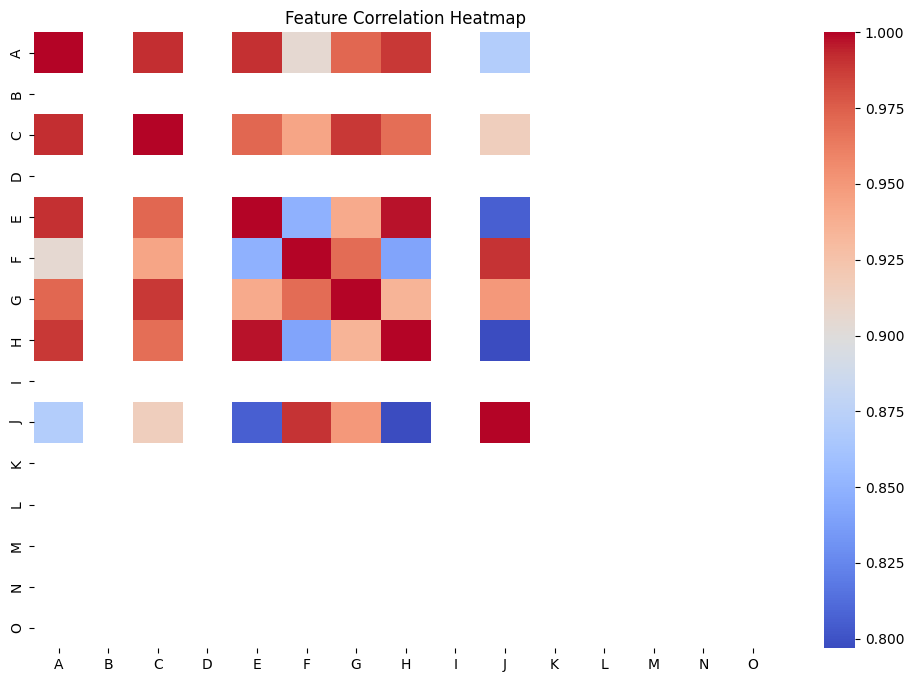

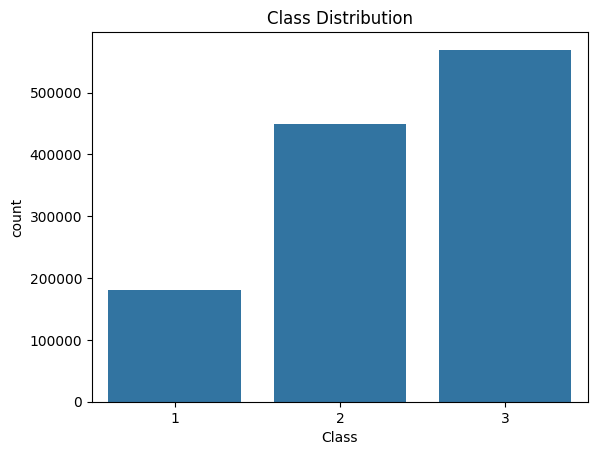

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pd.DataFrame(X_final1, columns=data.columns[:-1]).corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Class distribution
sns.countplot(x=y)
plt.title("Class Distribution")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = X_final1.iloc[:,-1]
y = X_final1.iloc[:,:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:25:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost - Accuracy: 0.7240125
XGBoost - F1 Score: 0.705466666096486
XGBoost - ROC AUC: 0.8389365979543421
XGBoost - Bias: -0.018283333333333332
XGBoost - Confusion Matrix:
 [[11709     0 24480]
 [    0 89835    10]
 [11611 30136 72219]]


<ipython-input-41-eabf13aa90bf>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb, palette='viridis')


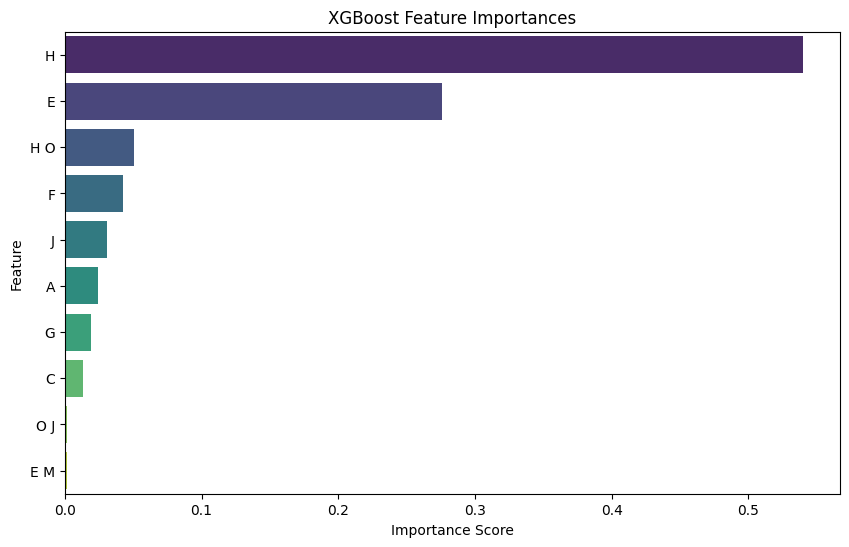

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming X_final1 is your DataFrame
X = X_final1.drop('Class', axis=1)
y = X_final1['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost model
from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Encode the target labels (if they are non-contiguous, like [1, 2, 3] instead of [0, 1, 2])
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)  # This will map your labels to [0, 1, 2] or [0, 1, 2, 3]
y_test_encoded = label_encoder.transform(y_test)

# Define hyperparameters grid
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
}

# Perform RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=50, cv=3, n_jobs=-1, random_state=42)
xgb_random_search.fit(X_train, y_train_encoded)

# Get the best model
best_xgb_model = xgb_random_search.best_estimator_

# Make predictions with the best model
y_pred_xgb_encoded = best_xgb_model.predict(X_test)

# Convert the predictions back to the original labels
y_pred_xgb_original = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_original)
f1_score_xgb = classification_report(y_test, y_pred_xgb_original, output_dict=True)['weighted avg']['f1-score']

# Confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb_original)

# ROC AUC score (for binary classification, otherwise, this can be skipped for multi-class)
roc_auc_xgb = roc_auc_score(y_test_encoded, best_xgb_model.predict_proba(X_test), multi_class="ovr")

# Bias (mean of the prediction errors)
bias_xgb = np.mean(y_pred_xgb_original - y_test)

# Print evaluation metrics
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - F1 Score:", f1_score_xgb)
print("XGBoost - ROC AUC:", roc_auc_xgb)
print("XGBoost - Bias:", bias_xgb)
print("XGBoost - Confusion Matrix:\n", conf_matrix_xgb)

# Feature importance visualization
feature_importances_xgb = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_xgb, palette='viridis')
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Shape of X_train: (960000, 10)
Shape of y_train: (960000,)


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Random Forest - Accuracy: 0.7241083333333334
Random Forest - F1 Score: 0.7127497903107404
Random Forest - ROC AUC: Not applicable for multiclass classification
Random Forest - Bias: -0.1578375
Random Forest - Confusion Matrix:
 [[20087     0 16102]
 [    0 89845     0]
 [19973 30139 63854]]


<ipython-input-42-98a4e6a755bd>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')


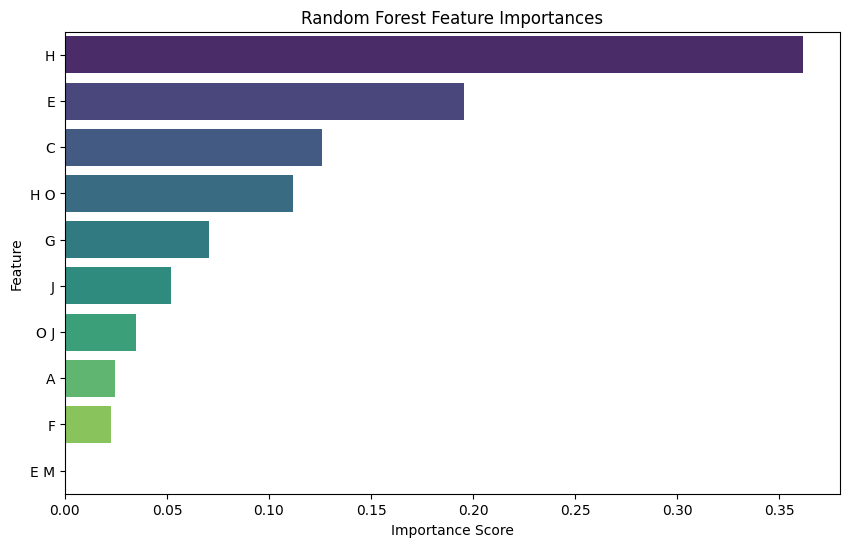

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Ensure dataset compatibility
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

# Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Define hyperparameters grid
param_grid_rf = {
    'n_estimators': [100, 150],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False],
}

# Perform RandomizedSearchCV with limited jobs
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid_rf,
    n_iter=30,  # Reduced iterations for efficiency
    cv=3,
    n_jobs=4,  # Limit parallel jobs to avoid memory issues
    random_state=42
)
rf_random_search.fit(X_train, y_train)

# Get the best model
best_rf_model = rf_random_search.best_estimator_

# Evaluate the model
y_pred_rf = best_rf_model.predict(X_test)

# Accuracy and F1 score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_score_rf = classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score']

# Confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

# ROC AUC score (for binary classification only)
if len(np.unique(y_test)) == 2:
    roc_auc_rf = roc_auc_score(y_test, best_rf_model.predict_proba(X_test)[:, 1])
else:
    roc_auc_rf = None

# Bias (mean of prediction errors)
bias_rf = np.mean(y_pred_rf - y_test)

# Print evaluation metrics
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_score_rf)
if roc_auc_rf is not None:
    print("Random Forest - ROC AUC:", roc_auc_rf)
else:
    print("Random Forest - ROC AUC: Not applicable for multiclass classification")
print("Random Forest - Bias:", bias_rf)
print("Random Forest - Confusion Matrix:\n", conf_matrix_rf)

# Feature importance visualization
feature_importances_rf = pd.DataFrame({
    'Feature': X_train.columns,  # Ensure X_train is a DataFrame with column names
    'Importance': best_rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_rf, palette='viridis')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()


Neural Network - Accuracy: 0.7246708333333334
Neural Network - F1 Score: 0.7120259467091355
Neural Network - ROC AUC: 0.8388850680293097
Neural Network - Bias: -0.10504583333333334
Neural Network - Confusion Matrix:
 [[16987     0 19202]
 [    0 89845     0]
 [16738 30139 67089]]


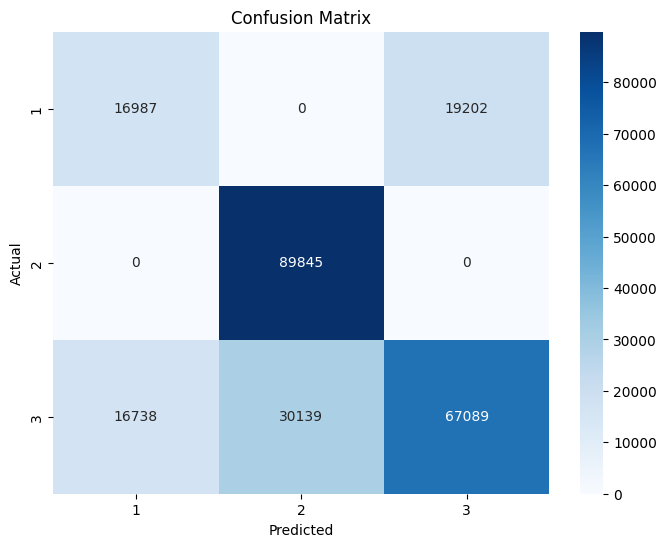

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the Neural Network model
nn_model = MLPClassifier(max_iter=1000, solver='adam', random_state=42)

# Define hyperparameters grid for RandomizedSearchCV
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': [0.0001, 0.001, 0.01],
    'early_stopping': [True],
    'batch_size': ['auto', 32, 64],
}

# Perform RandomizedSearchCV
nn_random_search = RandomizedSearchCV(
    estimator=nn_model,
    param_distributions=param_grid_nn,
    n_iter=50,
    cv=3,
    n_jobs=-1,
    random_state=42
)
nn_random_search.fit(X_train, y_train)

# Get the best model
best_nn_model = nn_random_search.best_estimator_

# Evaluate the model
y_pred_nn = best_nn_model.predict(X_test)

# Accuracy and F1 score
accuracy_nn = accuracy_score(y_test, y_pred_nn)
f1_score_nn = classification_report(y_test, y_pred_nn, output_dict=True, zero_division=0)['weighted avg']['f1-score']

# Confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)

# ROC AUC score (handle multi-class)
if len(np.unique(y_test)) == 2:
    roc_auc_nn = roc_auc_score(y_test, best_nn_model.predict_proba(X_test)[:, 1])
else:
    roc_auc_nn = roc_auc_score(y_test, best_nn_model.predict_proba(X_test), multi_class='ovr')

# Bias (mean of the prediction errors)
bias_nn = np.mean(y_pred_nn - y_test)

# Print evaluation metrics
print("Neural Network - Accuracy:", accuracy_nn)
print("Neural Network - F1 Score:", f1_score_nn)
print("Neural Network - ROC AUC:", roc_auc_nn)
print("Neural Network - Bias:", bias_nn)
print("Neural Network - Confusion Matrix:\n", conf_matrix_nn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nn, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
!pip install onnx
!pip install skl2onnx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2.17.1 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 

In [ ]:
import onnx
import skl2onnx
from skl2onnx import convert
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.metrics import accuracy_score, classification_report


# Make predictions for each model on the test data
y_pred_xgb_original = best_xgb_model.predict(X_test)
y_pred_rf = best_rf_model.predict(X_test)
y_pred_nn = best_nn_model.predict(X_test)

# Calculate accuracy and F1 scores
accuracy_xgb = accuracy_score(y_test, y_pred_xgb_original)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_nn = accuracy_score(y_test, y_pred_nn)

f1_score_xgb = classification_report(y_test, y_pred_xgb_original , output_dict=True)['weighted avg']['f1-score']
f1_score_rf = classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score']
f1_score_nn = classification_report(y_test, y_pred_nn, output_dict=True)['weighted avg']['f1-score']

# Print accuracy and F1 scores
print("XGBoost - Accuracy:", accuracy_xgb)
print("XGBoost - F1 Score:", f1_score_xgb)
print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - F1 Score:", f1_score_rf)
print("Neural Network - Accuracy:", accuracy_nn)
print("Neural Network - F1 Score:", f1_score_nn)

# Evaluate and select the best model based on F1 score or accuracy
best_model = None
if f1_score_xgb > f1_score_rf and f1_score_xgb > f1_score_nn:
    best_model = best_xgb_model
    print("Best Model: XGBoost")
elif f1_score_rf > f1_score_xgb and f1_score_rf > f1_score_nn:
    best_model = best_rf_model
    print("Best Model: Random Forest")
else:
    best_model = best_nn_model
    print("Best Model: Neural Network")

# Convert the best model to ONNX
#onnx_model = convert(best_model, initial_types=[('input', FloatTensorType([None, X_train.shape[1]]))])
onnx_model = convert_sklearn(best_model, initial_types=[('input', FloatTensorType([None, X_train.shape[1]]))])

# Save the ONNX model
onnx_model_path = "/content/best_model.onnx"
onnx.save_model(onnx_model, onnx_model_path)

print(f"ONNX model saved to {onnx_model_path}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

XGBoost - Accuracy: 4.1666666666666665e-05
XGBoost - F1 Score: 4.0133598493376355e-05
Random Forest - Accuracy: 0.7241083333333334
Random Forest - F1 Score: 0.7127497903107404
Neural Network - Accuracy: 0.7246708333333334
Neural Network - F1 Score: 0.7120259467091355
Best Model: Random Forest
ONNX model saved to /content/best_model.onnx


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 9.2 MB/s eta 0:00:00


In [ ]:
import onnxruntime as ort
import numpy as np

# Load the ONNX model
onnx_session = ort.InferenceSession("/content/best_model.onnx")

# Prepare the input data
input_name = onnx_session.get_inputs()[0].name
# Convert the input data to a NumPy array
input_data = X_test.to_numpy().astype(np.float32) # Convert the DataFrame to a NumPy array

# Run the ONNX model
onnx_predictions = onnx_session.run(None, {input_name: input_data})

# Extract predictions
# The original model likely outputs a single prediction directly, not probabilities.
# So, we don't need argmax here. Instead, we directly take the predictions.
y_pred_onnx = onnx_predictions[0]

# Print predictions
print("Predictions from ONNX model:", y_pred_onnx)

Predictions from ONNX model: [1 1 3 ... 1 1 3]


In [ ]:
# Calculate accuracy and F1 score
accuracy_onnx = accuracy_score(y_test, y_pred_onnx)
f1_score_onnx = classification_report(y_test, y_pred_onnx, output_dict=True)['weighted avg']['f1-score']

# Print evaluation metrics
print("ONNX Model - Accuracy:", accuracy_onnx)
print("ONNX Model - F1 Score:", f1_score_onnx)


ONNX Model - Accuracy: 0.7241083333333334
ONNX Model - F1 Score: 0.7127497903107404
